<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>

Привет Артем! Меня зовут Марат, и я буду твоим ревьюером. Спешу сообщить что все ключевые этапы в работе выполнены,  с задачей тебе удалось справиться. По поводу обращения - в IT сфере принято общаться на «ты» :) Но, если привычней на «вы», дай знать. Как ревьюера моя задача помочь тебе в развитии, дав хорошие советы. Я внимательно посмотрю твой код, ознакомлюсь с твоими выводами и оставлю комментарии. Где то могу предложить небольшие исправление в коде, но ненавязчиво. Где потребуются уточнения, я оставлю много наводящих вопросов. Они помогут тебя с поиском верного решения.

Все мои комментарии размечены по цветам, для лучшего восприятия. 
    
<div class="alert alert-success">Зеленым цветом и словом «Успех» отмечены особо удачные и элегантные решения, которыми ты можешь гордиться. </div>
        
<div class="alert alert-warning">Желтым и значком словом «Совет», помечены решения у которых есть альтернативные решения, более оптимальные. Ты можешь найти их сразу и доработать проект, или отложить это на потом, для будущих проектах. Проект будет принят и без их доработки. </div>
        
<div class="alert alert-danger"> Красным цветом и значком словом «Ошибка» помечу твои решения, на которые стоит обратить внимание прежде всего. После их доработки проект будет принят. </div>
        
Залог успеха - работа сообща, взаимное уважение и работа в диалоге. Поэтому, помечай свои ответные комментарии на мои реплики заметным цветом или курсивом, так мне будет легче их отслеживать. Пожалуйста, не изменяй и не удаляй мои комментарии. Все это поможет выполнить повторную проверку быстрей.

</div>



---
    
Для лучшей коммуникации будет лучше если ты будешь оставлять ответные комментарий (cвои комментарии к исправлениям, вопросы), так результат будет лучше.  А чтобы ревьюры их не теряли, лучше их подсвечивать цветом (можешь выбрать свой, а можешь использовать   тот который я предложил ниже). И чтобы не возникло путаницы лучше оставлять указание на номер версии комментария по итерация:  

1 итерация

<div class="alert alert-info"> <b>Комментарии студентаV1:</b> Привет Марат!.</div>


2 итерация

<div class="alert alert-info"> <b>Комментарии студентаV2:</b> Исправлено.... </div>
    
    
И лучше подсвечивать свои комментарии цветом, для этого достаточно в ячейку markdown добавить: 

```html
<div class="alert alert-info"> <b>Комментарии студентаV2:</b> Исправлено.... </div>    

```    
    
Хорошая коммуникация залог успеха! )
    
---

# Описание проекта
Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.
«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе. 
Итак, вашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

## Загрузка данных

<div style="background-color:lavender; color:#black; text-align:left; padding:2%">
<font size="4", color= "black">Выполним необходимые импорты</font>

In [1]:
!pip install phik
!pip install shap
!pip install scikit-learn==1.6.0 -q
!pip install matplotlib==3.5.1 -q
!pip install missingno

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
import scipy.stats as st
import phik
import shap
import warnings
import missingno as msno

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, \
StandardScaler, MinMaxScaler, LabelEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, \
accuracy_score, recall_score, precision_score, confusion_matrix, roc_auc_score
from phik import resources, report, phik_matrix
from phik.report import plot_correlation_matrix
from matplotlib.patches import Patch

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

warnings.filterwarnings(
    "ignore",
    message=".*default behavior of `mode`.*",
    category=FutureWarning
)

In [3]:
RANDOM_STATE = 42

In [4]:
DEFAULT_PALETTE = [
    "#FF9999",  # розовый
    "#66B3FF",  # голубой
    "#99FF99",  # салатовый
    "#FFCC99",  # персиковый
    "#ff8c69",  # лососевый
    "#acb78e",  # болотный
    # можно добавить ещё цвета при необходимости
]

In [5]:
def missing_report(df):
    """
    Генерирует отчёт по пропущенным значениям в DataFrame.

    Функция вычисляет для каждого столбца:
      - общее количество пропущенных значений,
      - долю пропущенных значений от общего числа строк (в процентах, с точностью до 2 знаков).

    Результатом является новый DataFrame с двумя колонками:
      - `missing_values`: количество пропусков в столбце,
      - `% of total`: процент пропусков от общего числа строк.

    Столбцы в отчёте отсортированы по убыванию количества пропущенных значений.

    Args:
        df (pandas.DataFrame): Исходный DataFrame для анализа пропусков.

    Returns:
        pandas.DataFrame: Отчёт с количеством и процентом пропусков для каждого столбца.
    """
    cnt = df.isna().sum()
    pct = (cnt / len(df) * 100).round(2)
    report = (
        pd.concat([cnt, pct], axis=1, keys=['missing_values', '% of total'])
          .sort_values('missing_values', ascending=False)
    )
    return report

In [6]:
def duplicate_report(df):
    """
    Генерирует отчёт по дублированным строкам в DataFrame.

    Функция вычисляет общее число строк-дубликатов в переданном DataFrame
    и рассчитывает их долю от общего количества строк в процентах (с точностью до 2 знаков).

    Args:
        df (pandas.DataFrame): Исходный DataFrame для анализа дубликатов.

    Returns:
        pandas.DataFrame: Однострочный отчёт с двумя колонками:
            - `duplicate_rows`: количество повторяющихся строк,
            - `% of total`: процент дубликатов от общего числа строк.
    """
    total = len(df)
    dup_cnt = df.duplicated().sum()
    dup_pct = (dup_cnt / total * 100).round(2)
    report = pd.DataFrame({
        'duplicate_rows': [dup_cnt],
        '% of total':    [dup_pct]
    }, index=[''])
    return report

In [7]:
def normalize_text(df, cols=None):
    """
    Нормализует текстовые столбцы в DataFrame.

    Функция создаёт копию переданного DataFrame и приводит все значения в указанных
    текстовых столбцах к одному виду: преобразует в нижний регистр, убирает лишние
    пробелы в начале и конце строк, а также заменяет последовательности из
    нескольких пробельных символов одним пробелом.

    Args:
        df (pandas.DataFrame): Исходный DataFrame, содержищий столбцы для нормализации.
        cols (list of str or None, optional): Список имён столбцов, над которыми нужно
            выполнить нормализацию. Если None, то автоматически выбираются все
            столбцы типов object, string или category. По умолчанию None.

    Returns:
        pandas.DataFrame: Копия исходного DataFrame, в которой указанные столбцы
            содержат нормализованные текстовые значения. Пропущенные значения не трогаются.
    """   
    df_norm = df.copy()
    if cols is None:
        cols = df_norm.select_dtypes(include=['object', 'string', 'category']).columns

    for col in cols:
        s = df_norm[col]
        mask = s.notna()
        df_norm.loc[mask, col] = (
            s[mask]
            .astype(str)
            .str.lower()
            .str.strip()
            .str.replace(r'\s+', ' ', regex=True)
        )
    return df_norm

In [8]:
def text_dup_report(df):
    """
    Выводит отчёт о повторяющихся и уникальных текстовых значениях в DataFrame.

    Для каждого текстового столбца (типов object, string или category):
      - подсчитывается число уникальных значений (без учёта NaN);
      - выводится имя столбца и количество уникальных значений;
      - если число уникальных значений меньше 10, дополнительно выводятся частоты
        всех значений (включая NaN).

    Args:
        df (pandas.DataFrame): Исходный DataFrame для анализа текстовых столбцов.

    Returns:
        None: Функция выводит результаты в консоль и не возвращает DataFrame.
    """
    text_cols = df.select_dtypes(include=['object', 'string', 'category']).columns

    for col in text_cols:
        n_unique = df[col].nunique(dropna=True)

        print(f"--- Column: \033[0;34m{col}\033[0m ---")
        print(f"Unique values: {n_unique}")

        if n_unique < 10:
            print("Value counts:")
            print(df[col].value_counts(dropna=False))

        print()

In [9]:
def plot_hist_and_box(data, 
                      column='active_6m', 
                      bins=40, 
                      figsize=(16,8), 
                      hist_title='Гистограмма', 
                      box_title='Диаграмма размаха',
                      axis_label='Заголовок по оси X',
                      suptitle='Общий заголовок', 
                     ):
    """
    Строит рядом гистограмму и диаграмму размаха для одного столбца DataFrame.

    Функция создаёт две панели в одной фигуре:
      1. Гистограмма распределения значений с оценкой плотности (kde) и вертикальной 
         линией, обозначающей медиану.
      2. Диаграмма размаха (boxplot), показывающая разброс и выбросы.

    Args:
        data (pandas.DataFrame): Исходный DataFrame с данными.
        column (str): Имя числового столбца, по которому строятся графики. 
            По умолчанию 'active_6m'.
        bins (int): Число корзин (bins) для гистограммы. По умолчанию 40.
        figsize (tuple of int): Размер фигуры в дюймах (width, height). 
            По умолчанию (16, 8).
        hist_title (str): Заголовок над гистограммой. По умолчанию 'Гистограмма'.
        box_title (str): Заголовок над диаграммой размаха. По умолчанию 'Диаграмма размаха'.
        axis_label (str): Подпись по оси X для гистограммы. По умолчанию 'Заголовок по оси X'.
        suptitle (str): Общий заголовок всей фигуры. По умолчанию 'Общий заголовок'.

    Returns:
        None: Функция отображает графики и не возвращает значение.
    """
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=figsize)

    # Гистограмма с линией медианы
    sns.histplot(data=data, x=column, ax=axs[0], bins=bins, kde=True)
    median_val = data[column].median()
    axs[0].axvline(median_val, linestyle='--', label='Медиана')
    axs[0].legend()
    axs[0].set_xlabel(axis_label)
    axs[0].set_ylabel('Количество покупателей')
    axs[0].set_title(hist_title)

    # Диаграмма размаха
    sns.boxplot(data=data, x=column, ax=axs[1])
    axs[1].set_title(box_title)

    fig.suptitle(suptitle)
    plt.tight_layout()
    plt.show()

In [10]:
def plot_two_pie_charts(data, columns, titles, palette=None, figsize=(12, 6)):
    """
    Строит два pie-чарта с возможностью передать свою палитру.
    Если palette=None, берётся DEFAULT_PALETTE.
    """
    if palette is None:
        palette = DEFAULT_PALETTE

    if len(columns) != 2 or len(titles) != 2:
        raise ValueError("Пожалуйста, передайте ровно два столбца и два заголовка.")
    
    fig, axs = plt.subplots(1, 2, figsize=figsize)
    for ax, col, title in zip(axs, columns, titles):
        data[col].value_counts().plot(
            kind='pie',
            autopct='%1.0f%%',
            title=title,
            colors=palette,
            ax=ax
        )
        ax.set_xlabel('')
        ax.set_ylabel('')
    plt.tight_layout()
    plt.show()

In [11]:
def plot_scatter(data, x, hue, title, figsize=(12, 8)):
    """
    Строит точечную диаграмму (scatter plot) зависимости значения заданного признака от прибыли.

    Диаграмма отображает на оси X значения столбца `x`, на оси Y — фиксированного целевого столбца
    `profit_rub`. Точки раскрашиваются по категориям из столбца `hue` и масштабируются по размеру
    в зависимости от столбца `type_service`.

    Args:
        data (pandas.DataFrame): Исходный DataFrame с данными.
        x (str): Название столбца, значения которого откладываются по горизонтальной оси.
        hue (str): Название категориального столбца для раскраски точек.
        title (str): Заголовок графика.
        figsize (tuple of int, optional): Размер фигуры в дюймах (width, height). По умолчанию (12, 8).

    Returns:
        None: Функция отображает график и не возвращает значение.
    """
    target = 'profit_rub'
    size = 'type_service'
    
    plt.figure(figsize=figsize)
    sns.scatterplot(data=data, x=x, y=target, hue=hue, size=size)
    plt.title(title, fontsize=12)
    plt.xlabel(x, fontsize=12)
    plt.ylabel(target, fontsize=12)
    plt.show()

In [12]:
def plot_segment_comparison(
    df_1,                      # df_1, df_2: DataFrames с одинаковыми столбцами
    df_2,
    groupby_cols,              # список колонок для группировки
    value_col,                 # колонка с числовым значением
    segment_names=('сегмент_1', 'сегмент_2'),
    top_n=None                 # сколько категорий показать (по убыванию); если None — все
):
    """
    Сравнивает два сегмента данных с помощью горизонтальных стопочных диаграмм.

    Для каждого из двух переданных DataFrame (df_1 и df_2) выполняется:
      1. Группировка по колонкам groupby_cols и суммирование значений в колонке value_col.
      2. Разворачивание последнего уровня индекса (unstack) для получения столбцов-категорий.
      3. Сортировка категорий по общей сумме по убыванию.
      4. Опциональное ограничение числа отображаемых категорий top_n.

    Затем строятся рядом две barh-диаграммы, на которых отображается распределение
    value_col по группам из groupby_cols для первого и второго сегмента соответственно.
    Общая легенда категорий выводится внизу фигуры.

    Args:
        df_1 (pandas.DataFrame): Данные первого сегмента.
        df_2 (pandas.DataFrame): Данные второго сегмента (аналогичной структуры).
        groupby_cols (list of str): Список колонок для группировки (порядок важен —
            последняя колонка станет уровнями в легенде).
        value_col (str): Название числовой колонки, значения которой складываются.
        segment_names (tuple of str, optional): Имена, отображаемые в заголовках
            левого и правого графиков. По умолчанию ('сегмент_1', 'сегмент_2').
        top_n (int or None, optional): Сколько верхних по сумме групп показать.
            Если None, отображаются все.

    Returns:
        None: Функция отображает фигуру с двумя бар-чартами и не возвращает значений.
    """
    def prepare(df):
        grp = (df
               .groupby(groupby_cols)[value_col]
               .sum()
               .unstack(fill_value=0))
        order = grp.sum(axis=1).sort_values(ascending=False).index
        grp = grp.loc[order]
        if top_n is not None:
            grp = grp.head(top_n)
        return grp

    data_1 = prepare(df_1)
    data_2 = prepare(df_2)

    fig, axes = plt.subplots(ncols=2, figsize=(20, 10), sharey=True)

    # Левый график
    data_1.plot(
        kind='barh',
        stacked=True,
        color=colors,
        ax=axes[0]
    )
    axes[0].set_title(f'{segment_names[0]}: \n{value_col} по {", ".join(groupby_cols)}')
    axes[0].set_xlabel(value_col)
    axes[0].set_ylabel(groupby_cols[0])

    # Правый график
    data_2.plot(
        kind='barh',
        stacked=True,
        color=colors,
        ax=axes[1]
    )
    axes[1].set_title(f'{segment_names[1]}: \n{value_col} по {", ".join(groupby_cols)}')
    axes[1].set_xlabel(value_col)
    axes[1].set_ylabel('')

    # Общая легенда внизу
    handles, labels = axes[1].get_legend_handles_labels()
    fig.legend(
        handles, labels,
        title=groupby_cols[-1],
        loc='lower center',
        ncol=len(labels)
    )

    plt.tight_layout(rect=[0, 0.05, 1, 1])
    plt.show()


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

    
    
Собираем все импорты в верхней части, чтобы легче было ориентироваться и добавлять новые по необходимости. 
Плюс за дополнительные настройки
    
    

<div class="alert alert-warning">


Совет:

   

- есть рекомендации PEP-8 при написании кода, в том числе и для импортов. Если интересно можешь почитать [тут](https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html). Есть что поправить 

 


<div class="alert alert-info"> <b>Комментарии студентаV1:</b> Привет Марат! Приянтно познакомиться! По поводу оформления импортов я уже второй раз получаю такой совет, но никак не могу разобраться, как именно я нарушил рекомендации PEP-8... Сейчас перенес три импорта вверх. Правильно?</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Привет Артём!  Взаимно


Вот это   
    
    from phik import resources, report, phik_matrix
    import missingno as msno
    
    
ставим в самый конец как сторонние библиотеки      

<div style="background-color:lavender; color:#black; text-align:left; padding:2%">
<font size="4", color= "black"> 1.1. Загрузим данные из csv-файлов в датафреймы c помощью библиотеки pandas</font>

In [13]:
try:
    market = pd.read_csv('/datasets/market_file.csv')
except FileNotFoundError:
    market = pd.read_csv('market_file.csv')

market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

    
<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

    
Успех:    
    

 

- молодец что используешь конструкцию try - except (if - else), этим ты проявляешь уважение к тем кто будет работать с твоим кодом.

    

In [14]:
market = market.rename(columns={'Покупательская активность': 'activity', 'Тип сервиса': 'type_service', \
                    'Разрешить сообщать': 'reporting', 'Маркет_актив_6_мес': 'active_6m', \
                   'Маркет_актив_тек_мес': 'active_current', 'Длительность': 'duration', \
                    'Акционные_покупки': 'promo_purchases', 'Популярная_категория': 'popular_category', \
                    'Средний_просмотр_категорий_за_визит': 'views_visit', \
                    'Неоплаченные_продукты_штук_квартал': 'unpaid_pcs', \
                   'Ошибка_сервиса': 'service_error', 'Страниц_за_визит': 'pages_visit'})




<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

 

Молодец что используешь rename,  чтобы не думать о порядке. 

 
    
    
 <div class="alert alert-warning">


Совет: 
 

- лучше всего автоматизировать процесс приведения к змеиному стилю воспользовавшись  .lower, а с помощью регуляризации    (или .replace) избавиться от точек, % итп, а если надо организовать нижние подчёркивание (привезти название столбцов к змеиному коду) 



<div class="alert alert-info"> <b>Комментарии студентаV1:</b> Да, я воспользовался этим ниже, а здесь переименовал только названия столбцов, было удобнее вручную</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:


Ты не мог автоматизировать потому что использовал буквы на латинице 

In [15]:
market.head()

,id,activity,type_service,reporting,active_6m,active_current,duration,promo_purchases,popular_category,views_visit,unpaid_pcs,service_error,pages_visit
0,215348,Снизилась,премиум,да,3.40,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.40,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.90,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.20,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.10,3,1064,0.94,Товары для детей,3,2,3,2


In [16]:
try:
    mmoney = pd.read_csv('/datasets/market_money.csv')
except FileNotFoundError:
    mmoney = pd.read_csv('market_money.csv')

mmoney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [17]:
mmoney = mmoney.rename(columns={'Период': 'period', 'Выручка': 'revenue'})

In [18]:
mmoney.head()

,id,period,revenue
0,215348,препредыдущий_месяц,0.00
1,215348,текущий_месяц,"3,293.10"
2,215348,предыдущий_месяц,0.00
3,215349,препредыдущий_месяц,"4,472.00"
4,215349,текущий_месяц,"4,971.60"


In [19]:
try:
    mtime = pd.read_csv('/datasets/market_time.csv')
except FileNotFoundError:
    mtime = pd.read_csv('market_time.csv')

mtime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [20]:
mtime = mtime.rename(columns={'Период': 'period', 'минут': 'minutes'})

In [21]:
mtime.head()

,id,period,minutes
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [22]:
try:
    money = pd.read_csv('/datasets/money.csv', sep = ';', decimal = ',')
except FileNotFoundError:
    money = pd.read_csv('money.csv', sep = ';', decimal = ',')

money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



👍sep = ';', decimal = ','


 
А вот это можно было не прописывать    
    
    sep = ','
    
, это и так по умолчанию    

<div class="alert alert-info"> <b>Комментарии студентаV1:</b> Исправил!</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



👍


 

In [23]:
money = money.rename(columns={'Прибыль': 'profit'})

In [24]:
money.head()

,id,profit
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


<div style="background-color:aquamarine; color:#black; text-align:left; padding:2%">
<font size="4", color= "black"><b>Результат:</b> мы сделали необходимые импорты, создали датафреймы, изучили данные и переименовали некоторые столбцы.</font>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

 
    
- данные загружены корректно
    

	
- предварительный обзор данных сделан

   




## Предобработка данных

<div style="background-color:lavender; color:#black; text-align:left; padding:2%">
<font size="4", color= "black">Посмотрим пропуски в данных</font>

In [25]:
dfs = {
    'market_file': market,
    'market_money': mmoney,
    'market_time': mtime,
    'money': money
}

In [26]:
reports = {name: missing_report(df) for name, df in dfs.items()}

for name, df in dfs.items():
    print(f"=== \033[1;34m{name}\033[0m ===")
    print(missing_report(df), "\n")

=== market_file ===
                  missing_values  % of total
id                             0        0.00
activity                       0        0.00
type_service                   0        0.00
reporting                      0        0.00
active_6m                      0        0.00
active_current                 0        0.00
duration                       0        0.00
promo_purchases                0        0.00
popular_category               0        0.00
views_visit                    0        0.00
unpaid_pcs                     0        0.00
service_error                  0        0.00
pages_visit                    0        0.00 

=== market_money ===
         missing_values  % of total
id                    0        0.00
period                0        0.00
revenue               0        0.00 

=== market_time ===
         missing_values  % of total
id                    0        0.00
period                0        0.00
minutes               0        0.00 

=== money ===
 

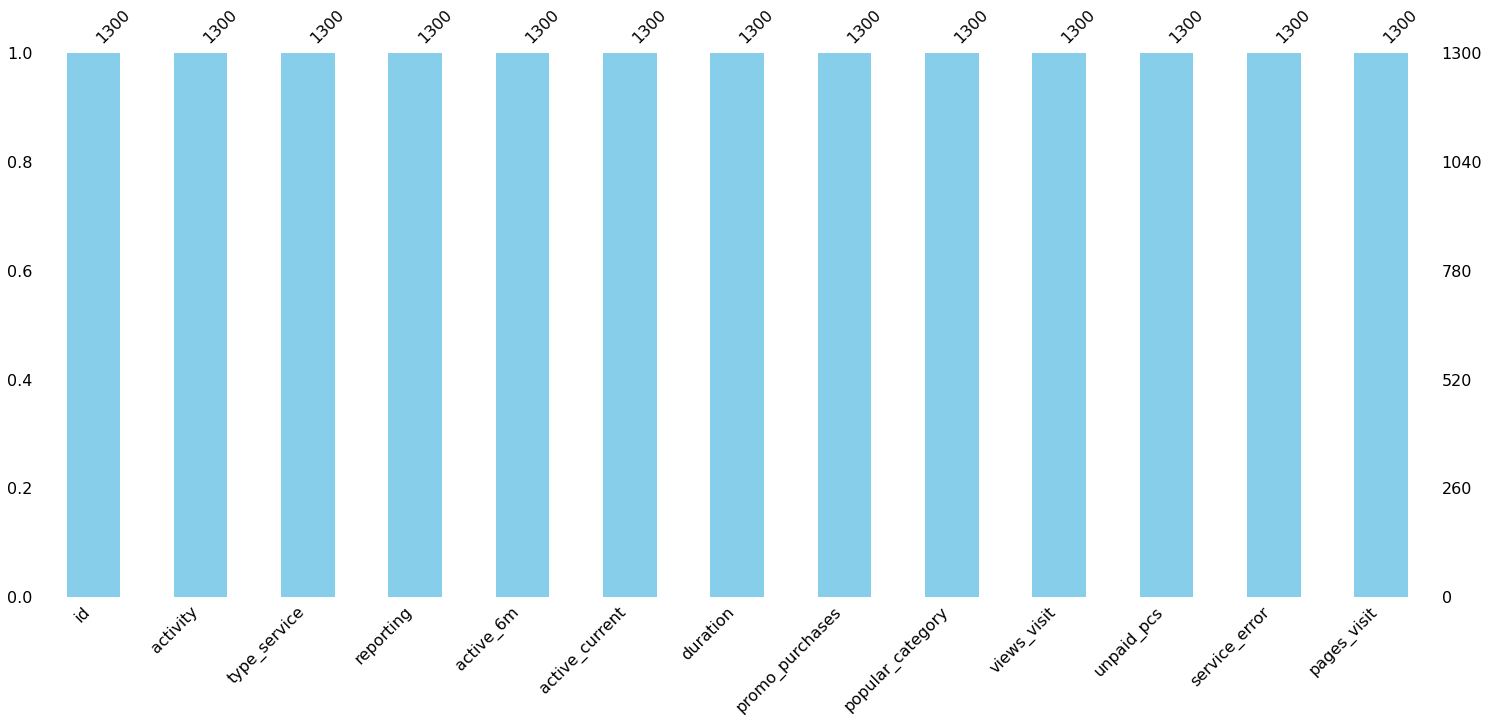

In [27]:
msno.bar(market, color='skyblue');

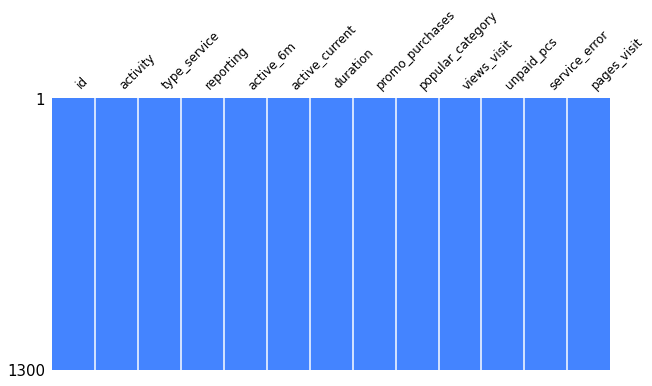

In [28]:
msno.matrix(
    market,
    sparkline=False,
    figsize=(10, 5),
    fontsize=12,
    color=(0.27, 0.52, 1.0)
);

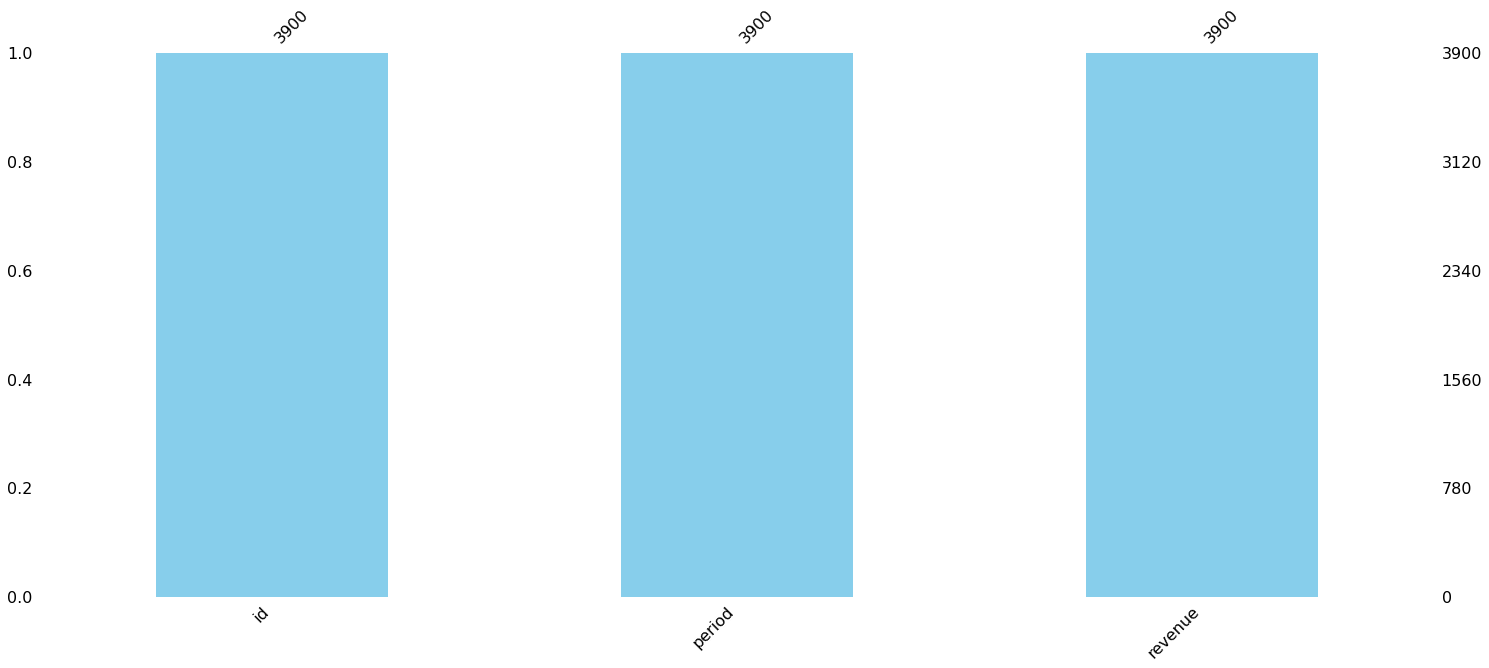

In [29]:
msno.bar(mmoney, color='skyblue');

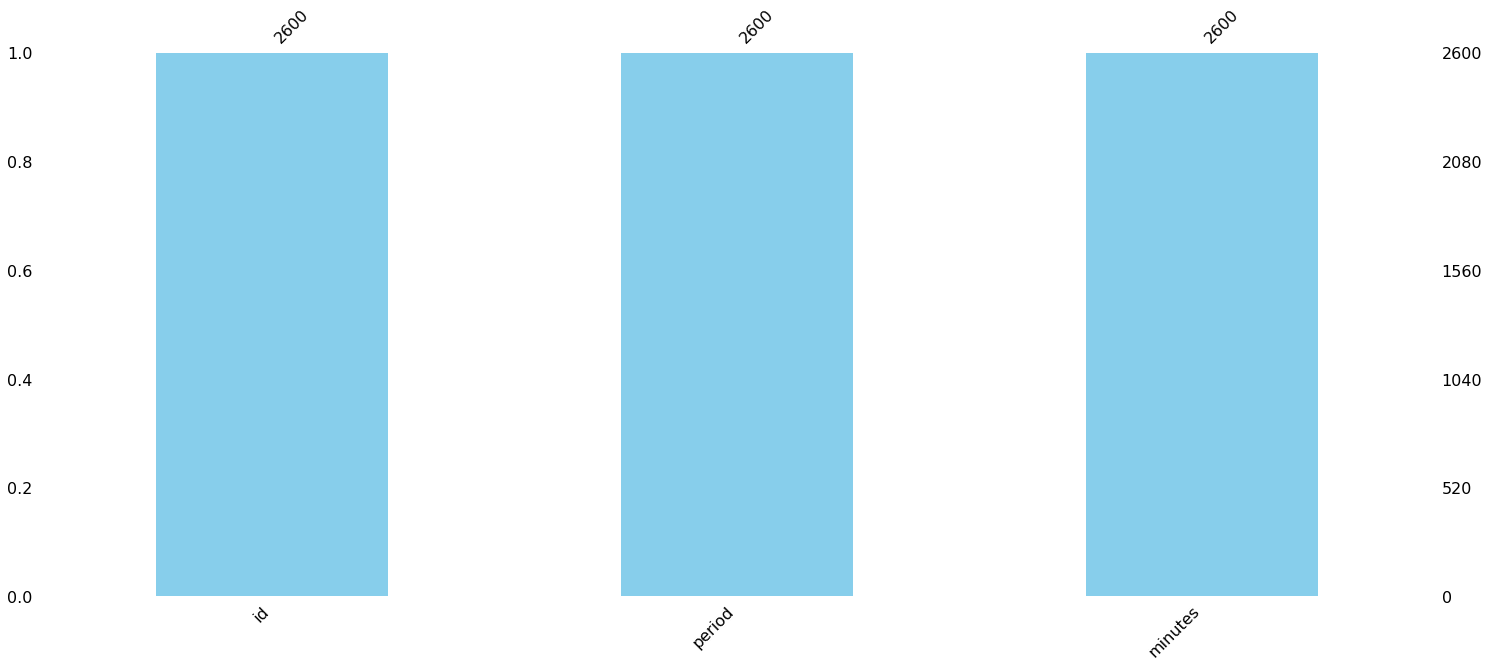

In [30]:
msno.bar(mtime, color='skyblue');

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:


 
 

- Можно визуализировать пропуски с помощью библиотеки [missingno](https://www.dmitrymakarov.ru/data/missing/), выглядит красиво


Там кстати есть дополнительный функционал

    msno.heatmap(df)

Так можно посмотреть на корреляцию между пропусками в разных столбцах. В общем такой удобный инструмент для визуализации и анализа пропущенных значений
 

<div class="alert alert-info"> <b>Комментарии студентаV1:</b> Очень наглядно! Спасибо, Марат!</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Наглядно, хотя в этом проекте не очень интересно из-за отсутствия пропусков

 

<div style="background-color:lavender; color:#black; text-align:left; padding:2%">
<font size="4", color= "black">Посмотрим явные дубликаты</font>

In [31]:
dup_reports = {name: duplicate_report(df) for name, df in dfs.items()}

for name, rep in dup_reports.items():
    print(f"=== \033[1;34m{name} — дубликаты\033[0m ===")
    print(rep, "\n")


=== market_file — дубликаты ===
  duplicate_rows  % of total
               0        0.00 

=== market_money — дубликаты ===
  duplicate_rows  % of total
               0        0.00 

=== market_time — дубликаты ===
  duplicate_rows  % of total
               0        0.00 

=== money — дубликаты ===
  duplicate_rows  % of total
               0        0.00 



<div style="background-color:lavender; color:#black; text-align:left; padding:2%">
<font size="4", color= "black">Посмотрим не явные дубликаты в текстовых столбцах, для уникальных значений меньше 10 посмотрим эти значения</font>

In [32]:
normalized_dfs = {name: normalize_text(df) for name, df in dfs.items()}

market, mmoney, mtime, money = (
    normalized_dfs['market_file'],
    normalized_dfs['market_money'],
    normalized_dfs['market_time'],
    normalized_dfs['money']
)

In [33]:
for name, df in dfs.items():
    print(f"=== \033[1;34m{name}\033[0m ===")
    text_dup_report(df)

=== market_file ===
--- Column: activity ---
Unique values: 2
Value counts:
Прежний уровень    802
Снизилась          498
Name: activity, dtype: int64

--- Column: type_service ---
Unique values: 3
Value counts:
стандарт     914
премиум      376
стандартт     10
Name: type_service, dtype: int64

--- Column: reporting ---
Unique values: 2
Value counts:
да     962
нет    338
Name: reporting, dtype: int64

--- Column: popular_category ---
Unique values: 6
Value counts:
Товары для детей                        330
Домашний текстиль                       251
Косметика и аксесуары                   223
Техника для красоты и здоровья          184
Мелкая бытовая техника и электроника    174
Кухонная посуда                         138
Name: popular_category, dtype: int64

=== market_money ===
--- Column: period ---
Unique values: 3
Value counts:
предыдущий_месяц       1300
препредыдущий_месяц    1300
текущий_месяц          1300
Name: period, dtype: int64

=== market_time ===
--- Column: period -

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



👍 нужные операции выделены в  функции






<div class="alert alert-warning">


 Совет:

     
    
И парочку cоветов по оформлению функций:    
    
- Для   простых функций   необходимости нет, код говорит сам за себя, но если хочешь попрактиковаться, можешь включить строку документации [docstring](https://dzen.ru/a/Yw02qy-7BGdhFhN3?utm_referer=yandex.ru).  Можно оставить описание того что делает эта функция, а затем попробовать вызвать что та напишешь с помощью
    
    
    print(my_function.__doc__)
    
или    
    
    help(my_function)


- Код создания функции обычно оставляет под импортами, так их легче контролировать
  

    
    


<div class="alert alert-info"> <b>Комментарии студентаV1:</b> Спасибо!!! Это действительно наглядно и легче контролировать. Исправляю во всем проекте</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Пожалуйста


 

In [34]:
market['type_service'] = market['type_service'].replace({'стандартт': 'стандарт'})
market['popular_category'] = market['popular_category'].replace({
    'косметика и аксесуары': 'косметика и аксессуары'
})
mtime['period'] = mtime['period'].replace({'предыдцщий_месяц': 'предыдущий_месяц'})

dfs = {
    'market_file': market,
    'market_money': mmoney,
    'market_time': mtime,
    'money': money
}

In [35]:
# Проверим корректировки
for name, df in dfs.items():
    print(f"=== \033[1;34m{name}\033[0m ===")
    text_dup_report(df)

=== market_file ===
--- Column: activity ---
Unique values: 2
Value counts:
прежний уровень    802
снизилась          498
Name: activity, dtype: int64

--- Column: type_service ---
Unique values: 2
Value counts:
стандарт    924
премиум     376
Name: type_service, dtype: int64

--- Column: reporting ---
Unique values: 2
Value counts:
да     962
нет    338
Name: reporting, dtype: int64

--- Column: popular_category ---
Unique values: 6
Value counts:
товары для детей                        330
домашний текстиль                       251
косметика и аксессуары                  223
техника для красоты и здоровья          184
мелкая бытовая техника и электроника    174
кухонная посуда                         138
Name: popular_category, dtype: int64

=== market_money ===
--- Column: period ---
Unique values: 3
Value counts:
предыдущий_месяц       1300
препредыдущий_месяц    1300
текущий_месяц          1300
Name: period, dtype: int64

=== market_time ===
--- Column: period ---
Unique values: 2

<div style="background-color:aquamarine; color:#black; text-align:left; padding:2%">
<font size="4", color= "black"><b>Результат:</b> пропусков в данных нет, явные и не явные дубликаты обработаны</font>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:



 

- здорово что обращено внимание на  скрытые дубликаты    и опечатки 
    
  


<div class="alert alert-warning">

Совет: 



- можно еще поискать опечатку 
	

<div class="alert alert-info"> <b>Комментарии студентаV1:</b> Опечатку нашел) Исправил "аксесуары" на "аксессуары"</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Верно (Хотя с точки зрения моделирования это ничего не меняет)


 

## Исследовательский анализ данных

<div style="background-color:lavender; color:#black; text-align:left; padding:2%">
<font size="4", color= "black">Проведем исследовательский анализ данных из каждой таблицы. Отберем клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период</font>

In [36]:
# Отберем клиентов с покупательской активностью не менее трёх месяцев
active_ids = (
    dfs['market_money']
      .groupby('id')['revenue']
      .min()
      .gt(0)
      .pipe(lambda s: s[s].index)
)

filtered = {
    name: df[df['id'].isin(active_ids)].reset_index(drop=True)
    for name, df in dfs.items()
}

market, mmoney, mtime, money = (
    filtered['market_file'],
    filtered['market_money'],
    filtered['market_time'],
    filtered['money']
)

In [37]:
market.describe()

,id,active_6m,active_current,duration,promo_purchases,views_visit,unpaid_pcs,service_error,pages_visit
count,"1,297.00","1,297.00","1,297.00","1,297.00","1,297.00","1,297.00","1,297.00","1,297.00","1,297.00"
mean,"215,998.99",4.25,4.01,602.99,0.32,3.27,2.84,4.18,8.19
std,374.58,1.02,0.70,249.10,0.25,1.35,1.97,1.95,3.98
min,"215,349.00",0.90,3.00,121.00,0.11,1.00,0.00,0.00,1.00
25%,"215,675.00",3.70,4.00,410.00,0.17,2.00,1.00,3.00,5.00
50%,"215,999.00",4.20,4.00,607.00,0.24,3.00,3.00,4.00,8.00
75%,"216,323.00",4.90,4.00,806.00,0.30,4.00,4.00,6.00,11.00
max,"216,647.00",6.60,5.00,"1,079.00",0.99,6.00,10.00,9.00,20.00


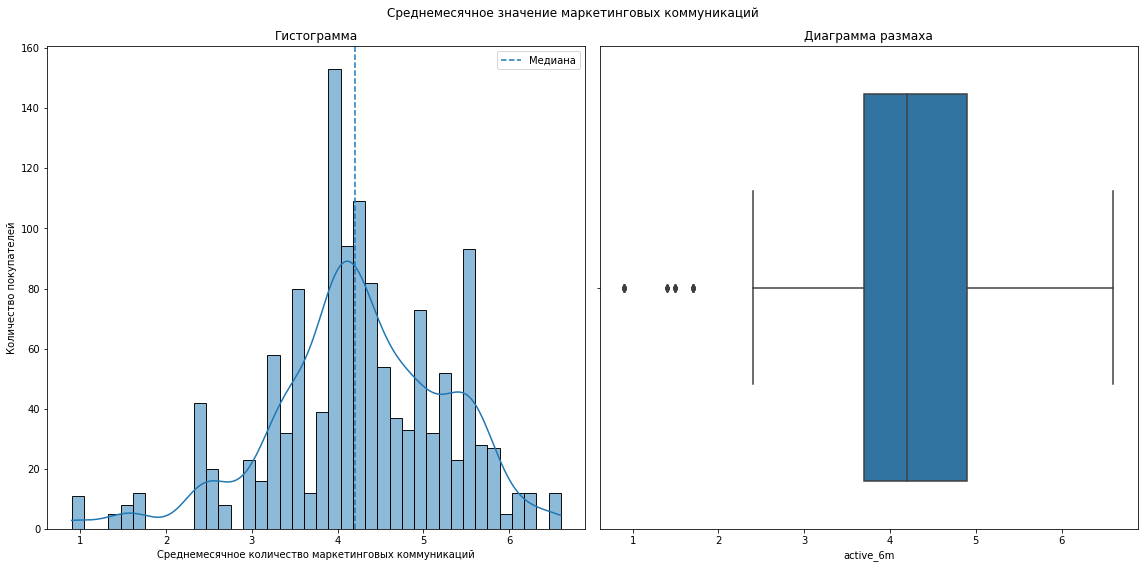

In [38]:
plot_hist_and_box(market, 
                  column='active_6m', 
                  axis_label='Среднемесячное количество маркетинговых коммуникаций',
                  suptitle='Среднемесячное значение маркетинговых коммуникаций'
                 )

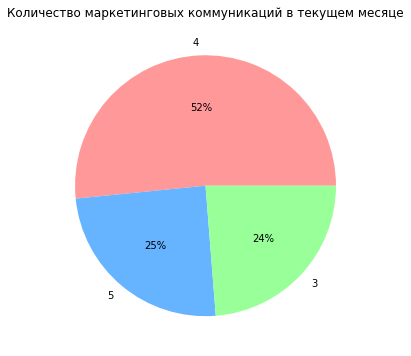

In [39]:
market['active_current'].value_counts().plot(
    y = 'count', 
    kind = 'pie', 
    autopct='%1.0f%%', 
    title = 'Количество маркетинговых коммуникаций в текущем месяце', 
    colors = DEFAULT_PALETTE, 
    figsize = (12, 6),
    ylabel=''
)
plt.show()

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка:



Данный столбец явно носят дискретный характер, а значит не стоит использовать гистограму/boxplot, стоит использовать трафик типа bar, pie, count.  Ведь гистограммы исходят из непрерывности данных, поэтому используют bins, а тут мы должны для каждого уникального значения вывести значение (countplot для каждого уникальные значения   строит свою корзину)
 

<div class="alert alert-info"> <b>Комментарии студентаV1:</b> Исправил на pie</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Управление принято (Хотя на мой взгляд лучше countplot,  ведь в данных есть упорядоченность)


 

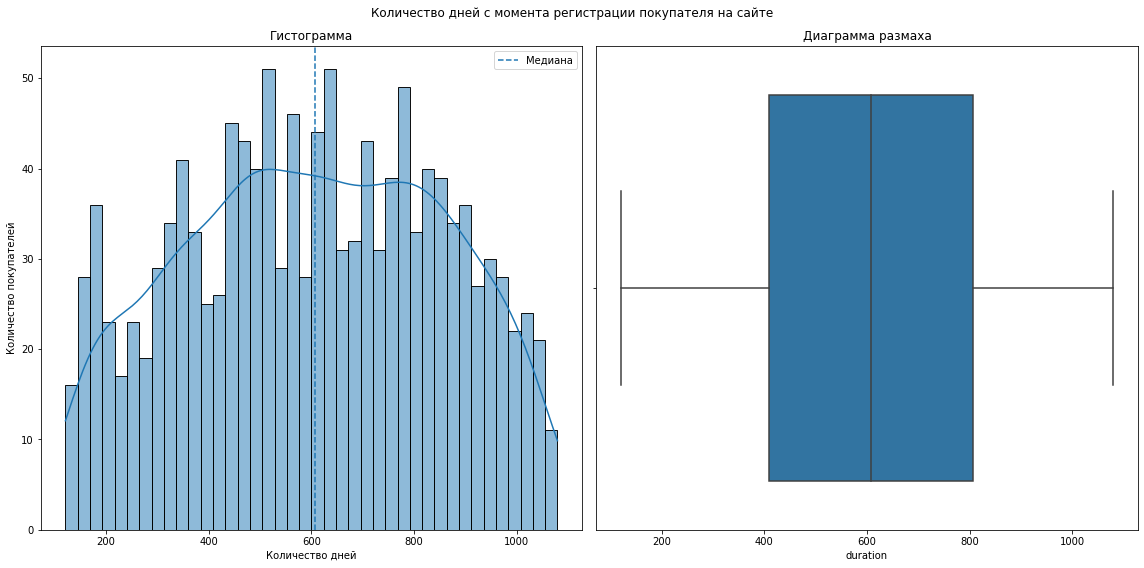

In [40]:
plot_hist_and_box(market, 
                  column='duration', 
                  axis_label='Количество дней',
                  suptitle='Количество дней с момента регистрации покупателя на сайте'
                 )

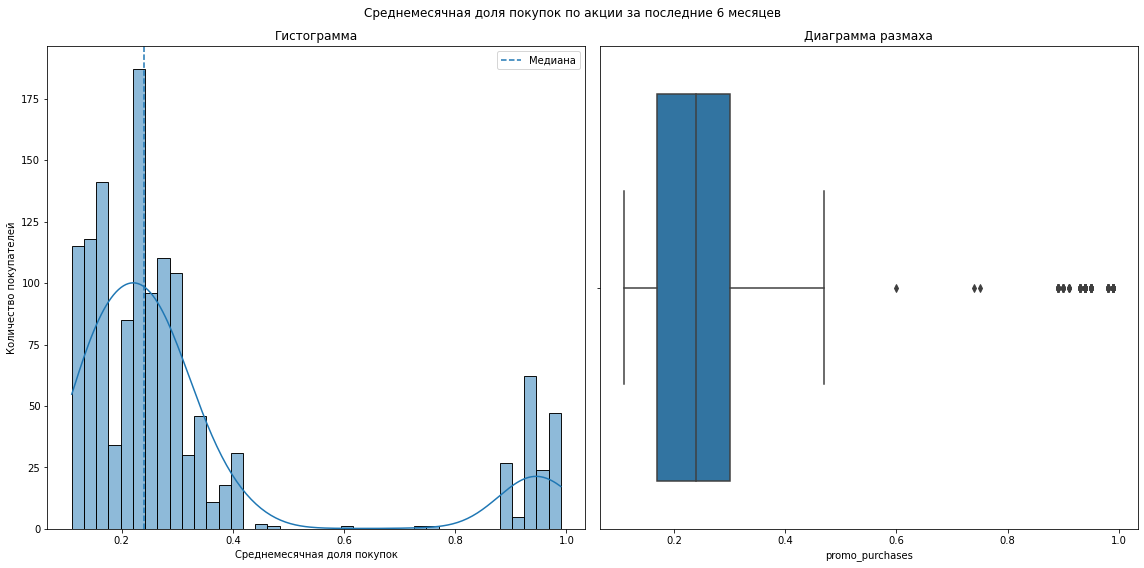

In [41]:
plot_hist_and_box(market, 
                  column='promo_purchases', 
                  axis_label='Среднемесячная доля покупок',
                  suptitle='Среднемесячная доля покупок по акции за последние 6 месяцев'
                 )

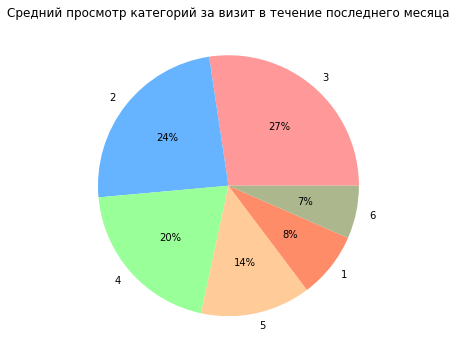

In [42]:
market['views_visit'].value_counts().plot(
    y = 'count', 
    kind = 'pie', 
    autopct='%1.0f%%', 
    title = 'Средний просмотр категорий за визит в течение последнего месяца', 
    colors = DEFAULT_PALETTE, 
    figsize = (12, 6),
    ylabel=''
)
plt.show()

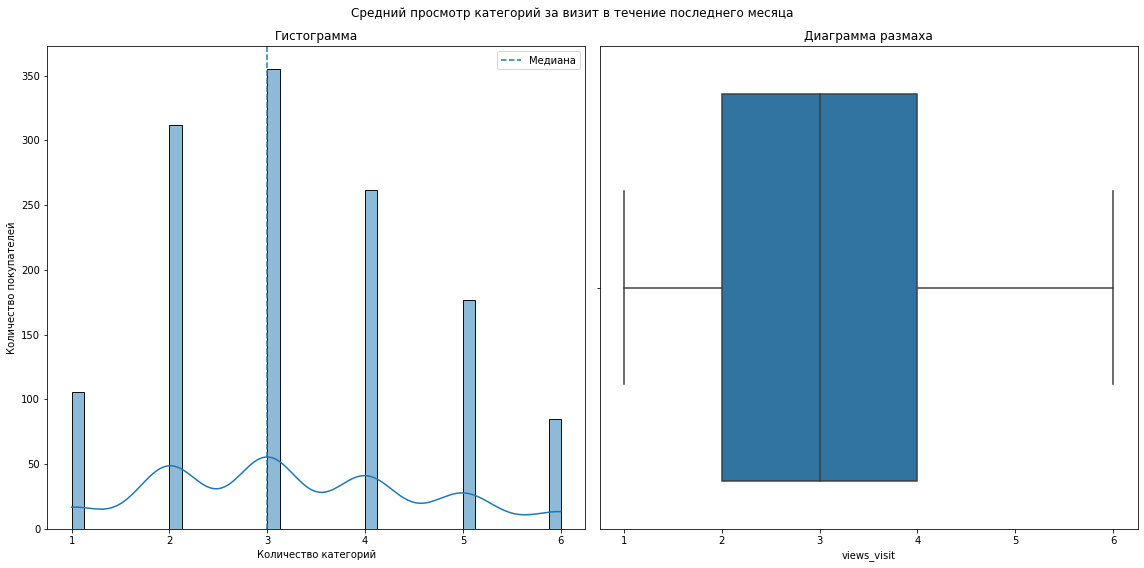

In [43]:
plot_hist_and_box(market, 
                  column='views_visit', 
                  axis_label='Количество категорий',
                  suptitle='Средний просмотр категорий за визит в течение последнего месяца'
                 )

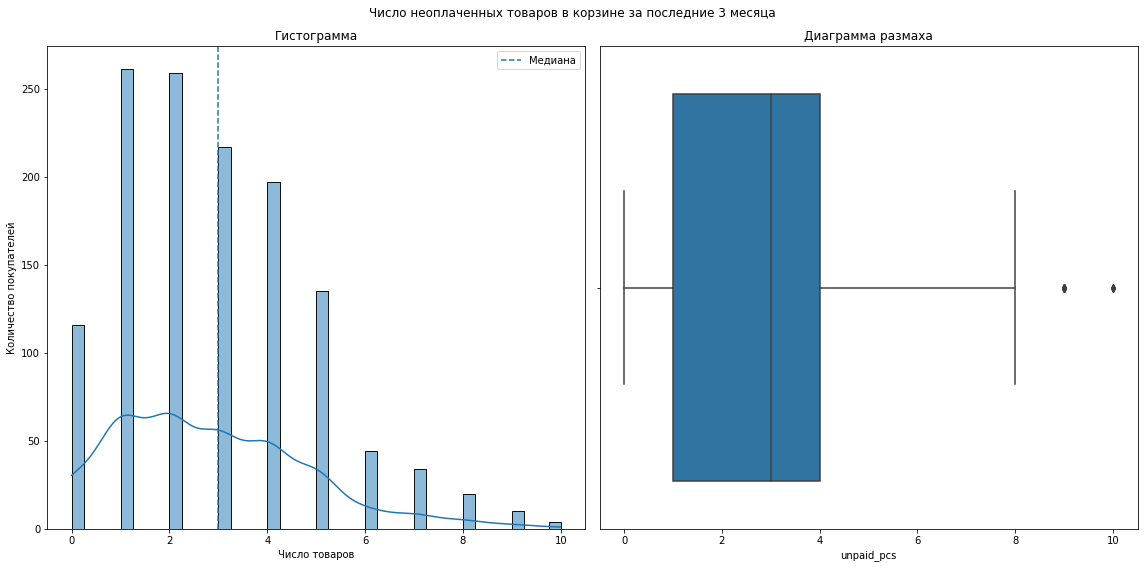

In [44]:
plot_hist_and_box(market, 
                  column='unpaid_pcs', 
                  axis_label='Число товаров',
                  suptitle='Число неоплаченных товаров в корзине за последние 3 месяца'
                 )

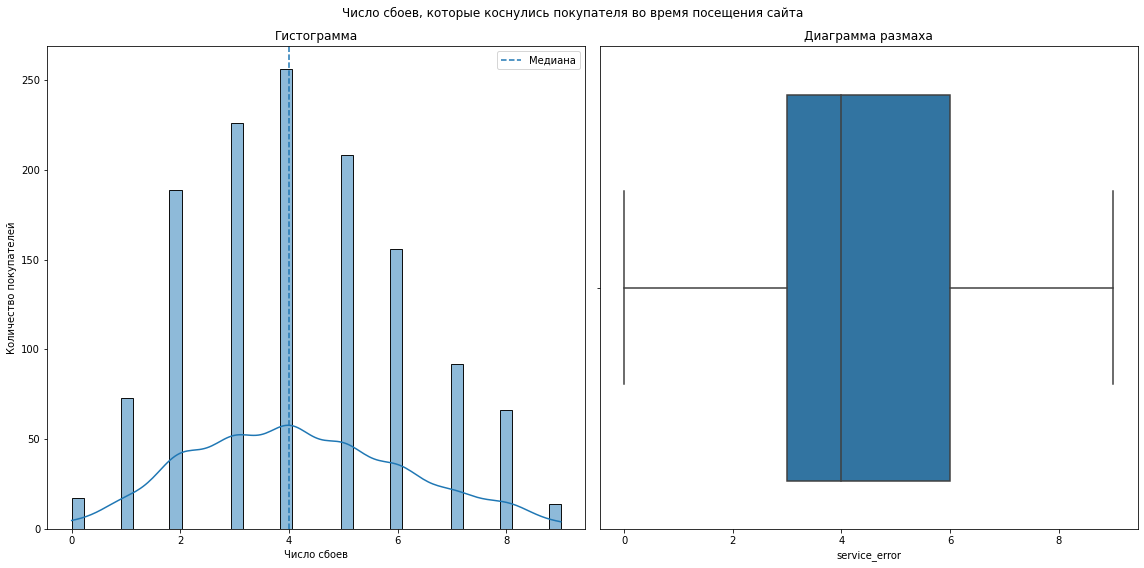

In [45]:
plot_hist_and_box(market, 
                  column='service_error', 
                  axis_label='Число сбоев',
                  suptitle='Число сбоев, которые коснулись покупателя во время посещения сайта'
                 )

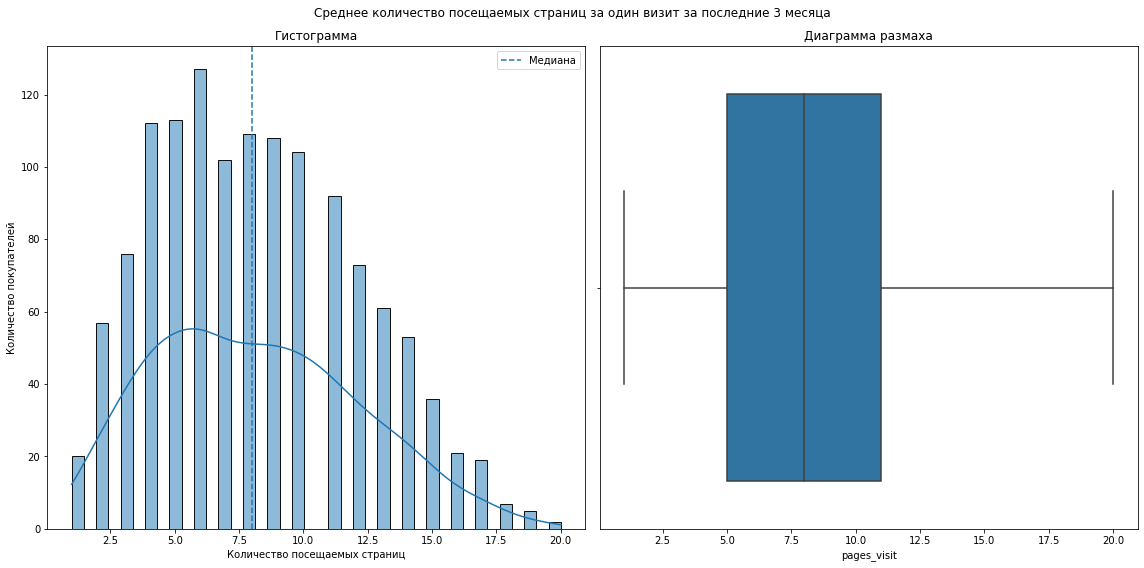

In [46]:
plot_hist_and_box(market, 
                  column='pages_visit', 
                  axis_label='Количество посещаемых страниц',
                  suptitle='Среднее количество посещаемых страниц за один визит за последние 3 месяца'
                 )

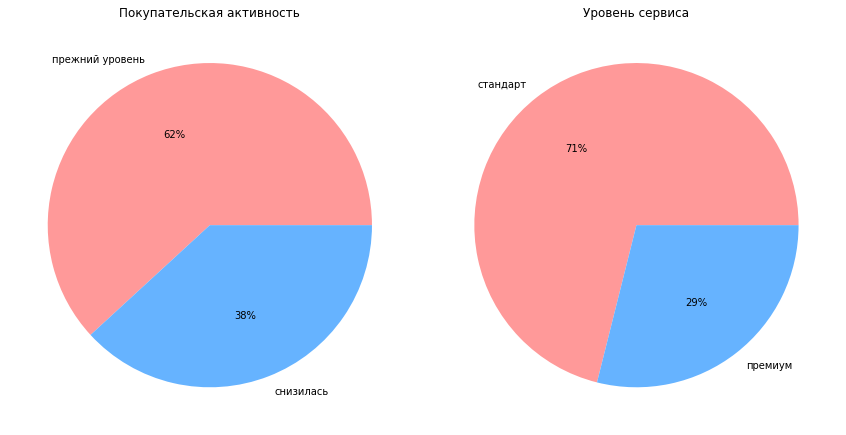

In [47]:
plot_two_pie_charts(market,
                      columns=['activity', 'type_service'],
                      titles=['Покупательская активность', 'Уровень сервиса']
                     )

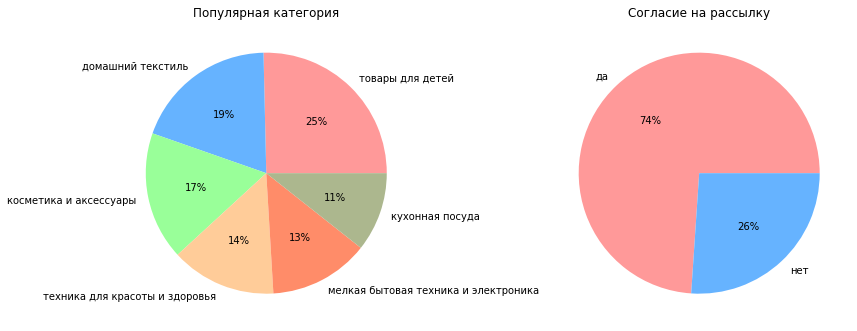

In [48]:
plot_two_pie_charts(market,
                      columns=['popular_category', 'reporting'],
                      titles=['Популярная категория', 'Согласие на рассылку']
                     )

In [49]:
mmoney.describe()

,id,revenue
count,"3,891.00","3,891.00"
mean,"215,998.99","5,033.72"
std,374.48,"1,768.47"
min,"215,349.00","2,758.70"
25%,"215,675.00","4,592.00"
50%,"215,999.00","4,959.00"
75%,"216,323.00","5,363.20"
max,"216,647.00","106,862.20"


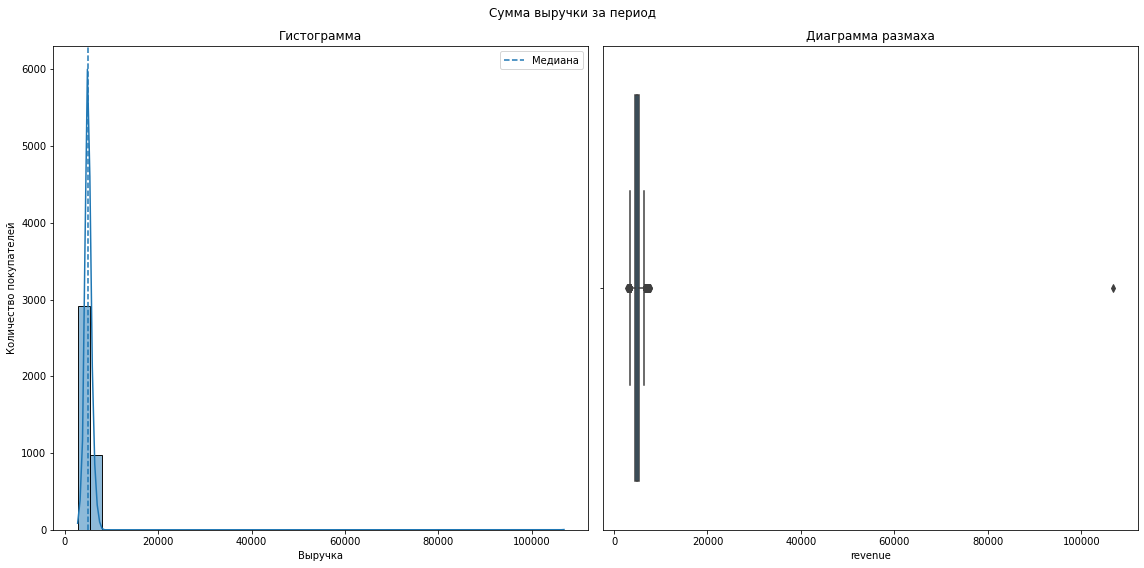

In [50]:
plot_hist_and_box(mmoney, 
                  column='revenue', 
                  axis_label='Выручка',
                  suptitle='Сумма выручки за период'
                 )

In [51]:
mmoney.query('revenue > 20000')

,id,period,revenue
89,215380,текущий_месяц,"106,862.20"


In [52]:
# Удалим выброс из датафрейма
mmoney = mmoney.query('revenue < 20000')

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



👍


 

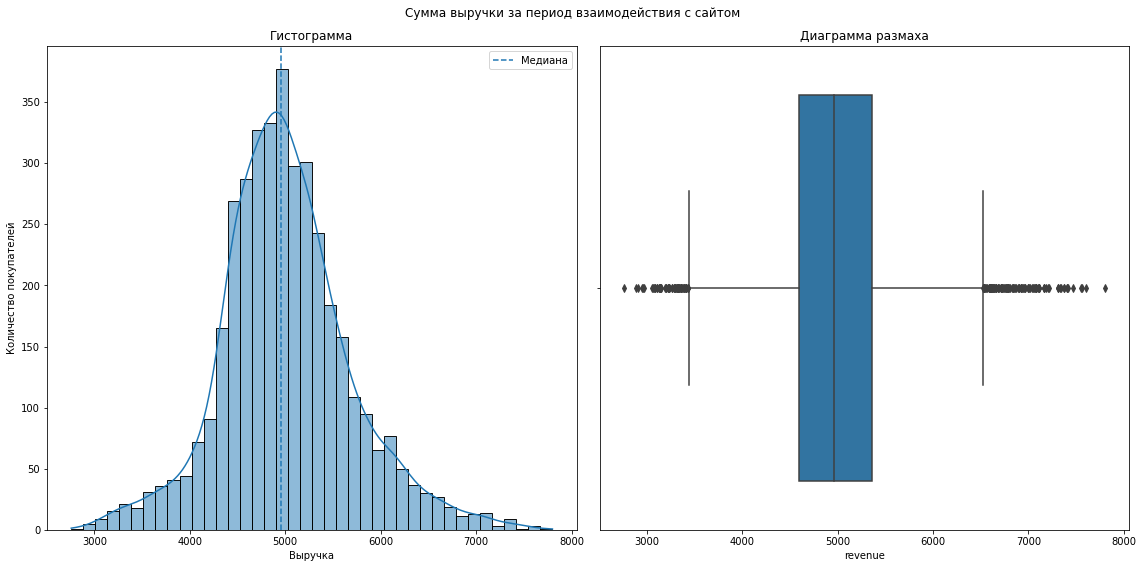

In [53]:
plot_hist_and_box(mmoney, 
                  column='revenue', 
                  axis_label='Выручка',
                  suptitle='Сумма выручки за период взаимодействия с сайтом'
                 )

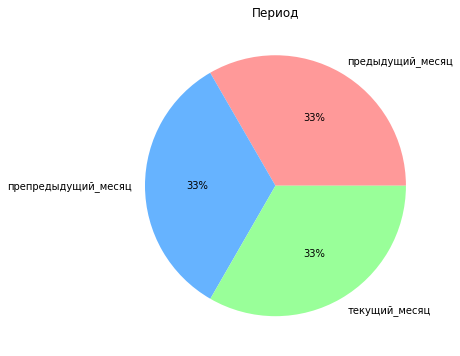

In [54]:
mmoney['period'].value_counts().plot(
    y = 'count', 
    kind = 'pie', 
    autopct='%1.0f%%', 
    title = 'Период', 
    colors = DEFAULT_PALETTE, 
    figsize = (12, 6),
    ylabel=''
)
plt.show()

In [55]:
mtime.describe()

,id,minutes
count,"2,594.00","2,594.00"
mean,"215,998.99",13.34
std,374.51,4.08
min,"215,349.00",4.00
25%,"215,675.00",10.00
50%,"215,999.00",13.00
75%,"216,323.00",16.00
max,"216,647.00",23.00


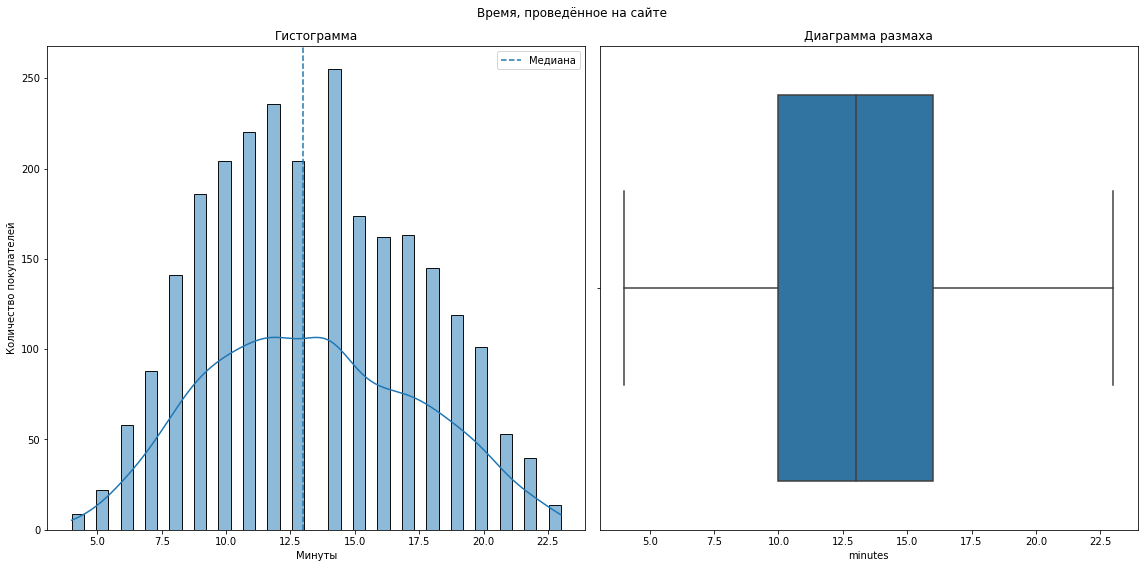

In [56]:
plot_hist_and_box(mtime, 
                  column='minutes', 
                  axis_label='Минуты',
                  suptitle='Время, проведённое на сайте'
                 )

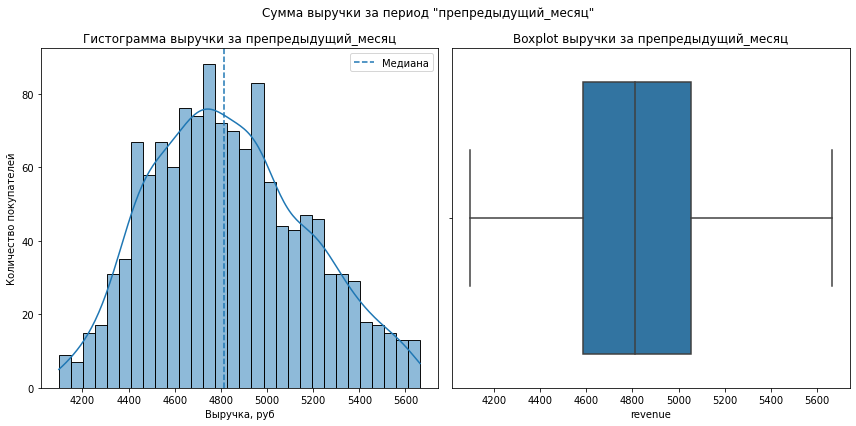

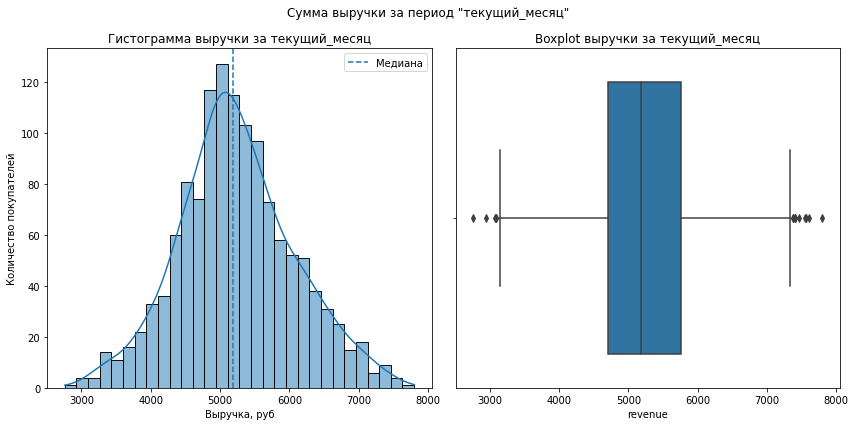

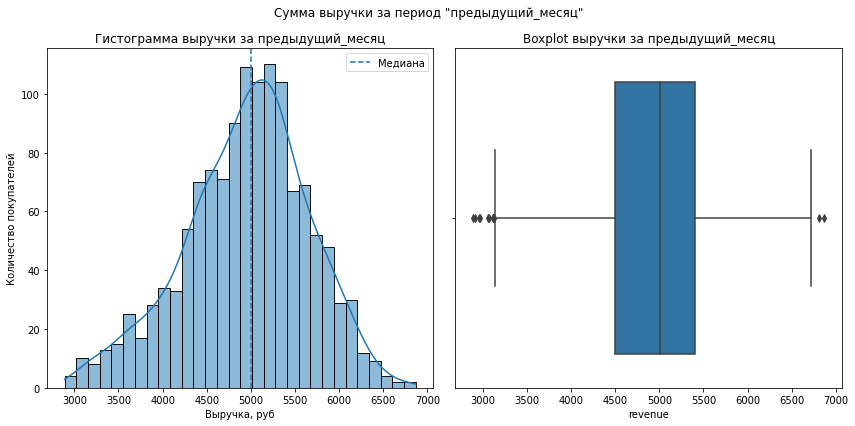

In [57]:
# Получаем список уникальных периодов в данных по выручке
periods = mmoney['period'].unique()

for p in periods:
    subset = mmoney[mmoney['period'] == p]
    plot_hist_and_box(
        subset,
        column='revenue',
        bins=30,
        figsize=(12, 6),
        hist_title=f'Гистограмма выручки за {p}',
        box_title=f'Boxplot выручки за {p}',
        axis_label='Выручка, руб',
        suptitle=f'Сумма выручки за период "{p}"'
    )

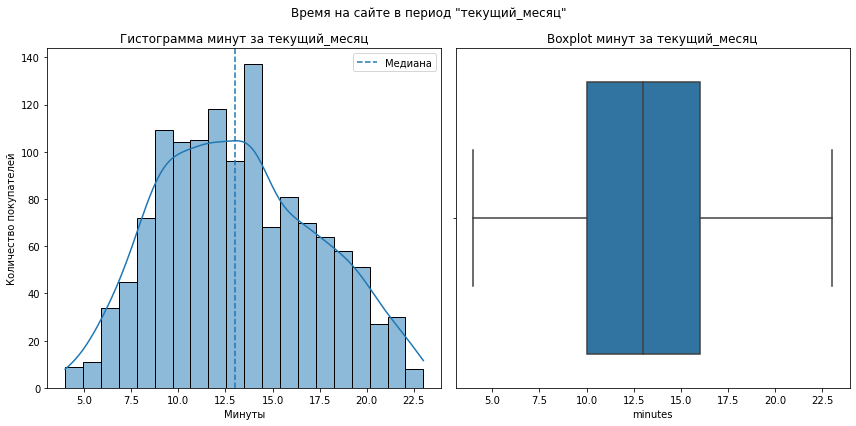

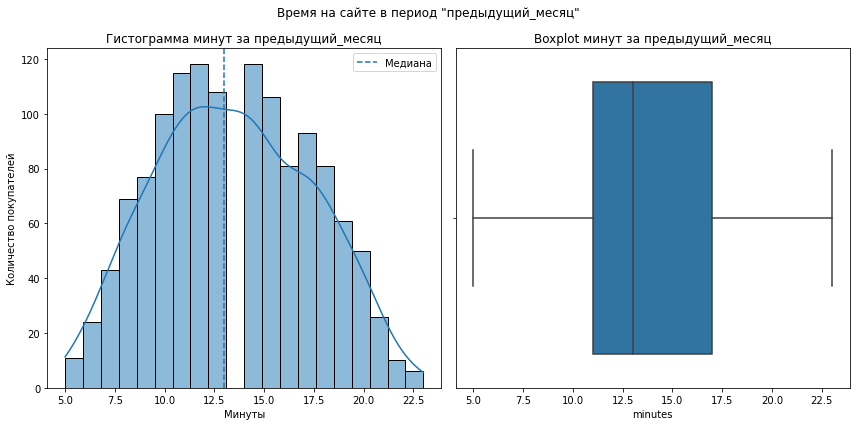

In [58]:
# Получаем список уникальных периодов
periods = mtime['period'].unique()

for p in periods:
    subset = mtime[mtime['period'] == p]
    plot_hist_and_box(
        subset,
        column='minutes',
        bins=20,
        figsize=(12, 6),
        hist_title=f'Гистограмма минут за {p}',
        box_title=f'Boxplot минут за {p}',
        axis_label='Минуты',
        suptitle=f'Время на сайте в период "{p}"'
    )



<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>


Совет:

    
- для гистограмм по выручке и минутам, стоит предварительно сделать группировку по "период" (у нас будет 3 графика по выручке и 2 по минутам), это разумно, ведь именно в таком виде мы используем их      

<div class="alert alert-info"> <b>Комментарии студентаV1:</b> Выполнено</div>

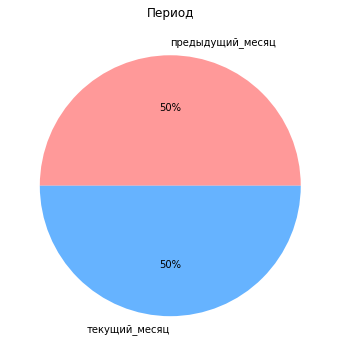

In [59]:
mtime['period'].value_counts().plot(
    y = 'count', 
    kind = 'pie', 
    autopct='%1.0f%%', 
    title = 'Период', 
    colors = DEFAULT_PALETTE, 
    figsize = (12, 6),
    ylabel=''
)
plt.show()

In [60]:
money.describe()

,id,profit
count,"1,297.00","1,297.00"
mean,"215,998.99",4.00
std,374.58,1.01
min,"215,349.00",0.86
25%,"215,675.00",3.30
50%,"215,999.00",4.04
75%,"216,323.00",4.67
max,"216,647.00",7.43


При средней выручке с покупателя порядка 5000 руб. прибыль не может изменяться единицами руб., делаем вывод, что прибыль в данных у нас выражается в %

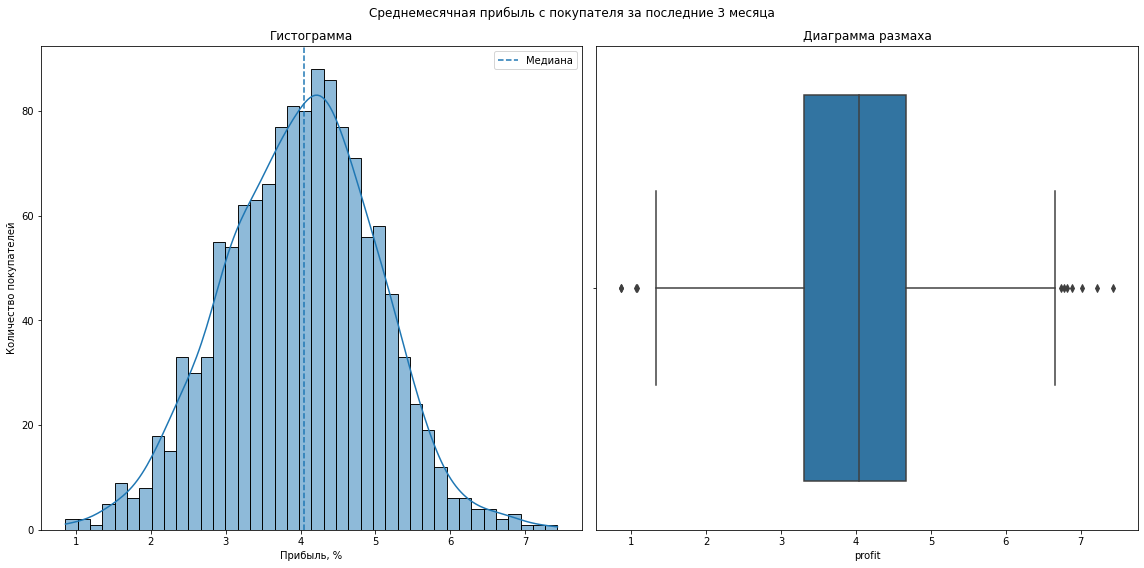

In [61]:
plot_hist_and_box(money, 
                  column='profit', 
                  axis_label='Прибыль, %',
                  suptitle='Среднемесячная прибыль с покупателя за последние 3 месяца'
                 )

<div style="background-color:aquamarine; color:#black; text-align:left; padding:2%">
<font size="4", color= "black"><b>Результат:</b> в рамках данного этапа мы выполнили исследовательский анализ данных. При этом для анализа были отобраны только клиенты с покупательской активностью не менее трёх месяцев, то есть те, которые что-либо покупали в этот период. Мы вывели графики для всех количественных и категориальных признаков по каждому датафрейму и проанализировали минимальные, максимальные, средние и медианные значения для каждого из количественных признаков. Изучили соотношения для категориальных признаков. Был обнаужен и удален один выброс в данных по выручке.
</font>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

    
 
	
	
- Правильно что продолжаешь практику с прошлого проекта и строишь 2 типа графиков для количественных признаков 
    

- Хорошо что используешь subplots, seaborn,   стоит стремиться к красивому и компактному оформлению графиков


- Для  разных типов данных используешь  соответствующие графики
    

- Написана функция для графика - полезно, особенно если много однотипного кода 
    

- Есть выводы по увиденному
 
 
  


<div class="alert alert-warning">


Совет 🤔:

   
- можно   для графиков распределений сделать разбивку по таргету. Так мы можем получить дополнительную информацию для лучшего понимания наших данные, может что-то пригодится для раздела сегментации 

- Можно для категориальных   построить [Sunburst-диаграммы](https://habr.com/ru/companies/otus/articles/502568/). Получим   наглядную иллюстрацию иерархических связей


## Объединение таблиц

<div style="background-color:lavender; color:#black; text-align:left; padding:2%">
<font size="4", color= "black">Объединим таблицы market_file.csv, market_money.csv, market_time.csv</font>

In [62]:
df1 = (
    mmoney
    .pivot(index='id', columns='period', values='revenue')
    .reset_index()
)
df1.columns.name = None
display(df1)

,id,предыдущий_месяц,препредыдущий_месяц,текущий_месяц
0,215349,"5,216.00","4,472.00","4,971.60"
1,215350,"5,457.50","4,826.00","5,058.40"
2,215351,"6,158.00","4,793.00","6,610.40"
3,215352,"5,807.50","4,594.00","5,872.50"
4,215353,"4,738.50","5,124.00","5,388.50"
...,...,...,...,...
1292,216643,"3,664.00","4,704.00","4,741.70"
1293,216644,"4,729.00","5,299.00","5,353.00"
1294,216645,"5,160.00","5,334.00","5,139.20"
1295,216646,"4,923.00","4,725.00","5,224.60"


In [63]:
df1 = df1.rename(columns={
    'текущий_месяц': 'current_rev',
    'предыдущий_месяц': 'pred_rev',
    'препредыдущий_месяц': 'predpr_rev'
})

print(df1.shape)
display(df1.head())

(1297, 4)


,id,pred_rev,predpr_rev,current_rev
0,215349,"5,216.00","4,472.00","4,971.60"
1,215350,"5,457.50","4,826.00","5,058.40"
2,215351,"6,158.00","4,793.00","6,610.40"
3,215352,"5,807.50","4,594.00","5,872.50"
4,215353,"4,738.50","5,124.00","5,388.50"


In [64]:
df2 = (
    mtime
    .pivot(index='id', columns='period', values='minutes')
    .reset_index()
)
df2.columns.name = None
display(df2)

,id,предыдущий_месяц,текущий_месяц
0,215349,12,10
1,215350,8,13
2,215351,11,13
3,215352,8,11
4,215353,10,10
...,...,...,...
1292,216643,14,7
1293,216644,12,11
1294,216645,12,18
1295,216646,18,7


In [65]:
df2 = df2.rename(columns={
    'текущий_месяц': 'current_min',
    'предыдущий_месяц': 'pred_min'
})

print(df2.shape)
display(df2.head())

(1297, 3)


,id,pred_min,current_min
0,215349,12,10
1,215350,8,13
2,215351,11,13
3,215352,8,11
4,215353,10,10


In [66]:
data = (
    market
    .merge(df1, on='id', how='inner')
    .merge(df2, on='id', how='inner')
)
data.set_index('id', inplace=True)

In [67]:
print(data.shape)
display(data.head())
data.info()

(1297, 17)


,activity,type_service,reporting,active_6m,active_current,duration,promo_purchases,popular_category,views_visit,unpaid_pcs,service_error,pages_visit,pred_rev,predpr_rev,current_rev,pred_min,current_min
id,,,,,,,,,,,,,,,,,
215349,снизилась,премиум,да,4.40,4,819,0.75,товары для детей,4,4,2,5,"5,216.00","4,472.00","4,971.60",12,10
215350,снизилась,стандарт,нет,4.90,3,539,0.14,домашний текстиль,5,2,1,5,"5,457.50","4,826.00","5,058.40",8,13
215351,снизилась,стандарт,да,3.20,5,896,0.99,товары для детей,5,0,6,4,"6,158.00","4,793.00","6,610.40",11,13
215352,снизилась,стандарт,нет,5.10,3,1064,0.94,товары для детей,3,2,3,2,"5,807.50","4,594.00","5,872.50",8,11
215353,снизилась,стандарт,да,3.30,4,762,0.26,домашний текстиль,4,1,1,4,"4,738.50","5,124.00","5,388.50",10,10


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297 entries, 215349 to 216647
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   activity          1297 non-null   object 
 1   type_service      1297 non-null   object 
 2   reporting         1297 non-null   object 
 3   active_6m         1297 non-null   float64
 4   active_current    1297 non-null   int64  
 5   duration          1297 non-null   int64  
 6   promo_purchases   1297 non-null   float64
 7   popular_category  1297 non-null   object 
 8   views_visit       1297 non-null   int64  
 9   unpaid_pcs        1297 non-null   int64  
 10  service_error     1297 non-null   int64  
 11  pages_visit       1297 non-null   int64  
 12  pred_rev          1297 non-null   float64
 13  predpr_rev        1297 non-null   float64
 14  current_rev       1296 non-null   float64
 15  pred_min          1297 non-null   int64  
 16  current_min       1297 non-null   i

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:

- print не всегда нужен, вывод последней строки   произойдет и так, а  для не последних, вместо print лучше использовать display, будет красивей



- А для .info()  вообще ничего не нужно,  ведь у этой функции нет никакого вывода, поэтому если использовать print/display, выскакивает None

<div class="alert alert-info"> <b>Комментарии студентаV1:</b> Исправил. Спасибо!</div>

In [68]:
dtype_map = {
    # числовые столбцы → float32
    'active_6m': 'float32',
    'promo_purchases': 'float32',
    'pred_rev': 'float32',
    'predpr_rev': 'float32',
    'current_rev': 'float32',
    # целочисленные → int32
    'active_current': 'int32',
    'duration': 'int32',
    'views_visit': 'int32',
    'unpaid_pcs': 'int32',
    'service_error': 'int32',
    'pages_visit': 'int32',
    'pred_min': 'int32',
    'current_min':'int32', 
    # категориальные → category
    'activity': 'category',
    'type_service':'category',
    'reporting': 'category',
    'popular_category': 'category'
}

data = data.astype(dtype_map)

In [69]:
data = data.dropna()
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 215349 to 216647
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   activity          1296 non-null   category
 1   type_service      1296 non-null   category
 2   reporting         1296 non-null   category
 3   active_6m         1296 non-null   float32 
 4   active_current    1296 non-null   int32   
 5   duration          1296 non-null   int32   
 6   promo_purchases   1296 non-null   float32 
 7   popular_category  1296 non-null   category
 8   views_visit       1296 non-null   int32   
 9   unpaid_pcs        1296 non-null   int32   
 10  service_error     1296 non-null   int32   
 11  pages_visit       1296 non-null   int32   
 12  pred_rev          1296 non-null   float32 
 13  predpr_rev        1296 non-null   float32 
 14  current_rev       1296 non-null   float32 
 15  pred_min          1296 non-null   int32   
 16  current_min      

<div style="background-color:aquamarine; color:#black; text-align:left; padding:2%">
<font size="4", color= "black"><b>Результат:</b> таблицы корректно объединены в один датафрейм (data), типы данных изменены для экономии памяти, ускорения обучения и упрощения дальнейшего кодирования</font>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



- данные для моделирования подготовлены верно


 


- правильно что использован pivot, оптимальный метод для  задачи если надо что то повернуть

 

## Корреляционный анализ

<div style="background-color:lavender; color:#black; text-align:left; padding:2%">
<font size="4", color= "black">Проведем корреляционный анализ признаков в количественной шкале в итоговой таблице для моделирования</font>

In [70]:
data.phik_matrix().style.background_gradient(cmap ='coolwarm')

interval columns not set, guessing: ['active_6m', 'active_current', 'duration', 'promo_purchases', 'views_visit', 'unpaid_pcs', 'service_error', 'pages_visit', 'pred_rev', 'predpr_rev', 'current_rev', 'pred_min', 'current_min']


,activity,type_service,reporting,active_6m,active_current,duration,promo_purchases,popular_category,views_visit,unpaid_pcs,service_error,pages_visit,pred_rev,predpr_rev,current_rev,pred_min,current_min
activity,1.000000,0.129940,0.000000,0.544831,0.000000,0.099901,0.506276,0.299717,0.539607,0.505655,0.224154,0.749888,0.224638,0.497393,0.197213,0.685138,0.576770
type_service,0.129940,1.000000,0.289965,0.089911,0.045258,0.401411,0.030010,0.070809,0.185391,0.120027,0.079515,0.102594,0.000000,0.069704,0.124216,0.131814,0.000000
reporting,0.000000,0.289965,1.000000,0.000000,0.052618,0.253831,0.012198,0.073684,0.070359,0.195982,0.021839,0.042134,0.080842,0.000000,0.060907,0.038387,0.000000
active_6m,0.544831,0.089911,0.000000,1.000000,0.079854,0.000000,0.279553,0.150386,0.206788,0.289421,0.142401,0.396769,0.155476,0.315331,0.039795,0.363950,0.330601
active_current,0.000000,0.045258,0.052618,0.079854,1.000000,0.174233,0.000000,0.136243,0.246633,0.144203,0.116946,0.000000,0.051824,0.000000,0.000000,0.107945,0.061410
duration,0.099901,0.401411,0.253831,0.000000,0.174233,1.000000,0.000000,0.000000,0.186795,0.192611,0.175608,0.122495,0.125572,0.113200,0.147048,0.026448,0.101481
promo_purchases,0.506276,0.030010,0.012198,0.279553,0.000000,0.000000,1.000000,0.122385,0.199180,0.237962,0.000000,0.311418,0.060733,0.226381,0.071094,0.262324,0.250558
popular_category,0.299717,0.070809,0.073684,0.150386,0.136243,0.000000,0.122385,1.000000,0.226116,0.248620,0.000000,0.160300,0.252097,0.043528,0.237240,0.195233,0.089883
views_visit,0.539607,0.185391,0.070359,0.206788,0.246633,0.186795,0.199180,0.226116,1.000000,0.325578,0.070315,0.262271,0.098440,0.176828,0.092597,0.159837,0.182568
unpaid_pcs,0.505655,0.120027,0.195982,0.289421,0.144203,0.192611,0.237962,0.248620,0.325578,1.000000,0.032907,0.363760,0.249171,0.261016,0.230022,0.256632,0.232383


In [71]:
interval_cols = [
    'active_6m', 'active_current', 'duration',
    'promo_purchases', 'views_visit', 'unpaid_pcs',
    'service_error', 'pages_visit',
    'pred_rev', 'predpr_rev', 'current_rev',
    'pred_min', 'current_min'
]

# Считаем phik-матрицу, передавая список interval_cols и желаемое число бинов:
full_corr = data.phik_matrix(
    interval_cols=interval_cols,
    bins=20
)

# Оставляем только нужные строки и столбцы:
phik_interval = full_corr.loc[interval_cols, interval_cols]

# Визуализируем градиентом:
phik_interval.style.background_gradient(cmap='coolwarm')

,active_6m,active_current,duration,promo_purchases,views_visit,unpaid_pcs,service_error,pages_visit,pred_rev,predpr_rev,current_rev,pred_min,current_min
active_6m,1.000000,0.086837,0.000000,0.340636,0.270554,0.226423,0.128059,0.322362,0.121184,0.252551,0.044887,0.310323,0.267900
active_current,0.086837,1.000000,0.232152,0.000000,0.246633,0.142887,0.116946,0.000000,0.042724,0.028880,0.000000,0.166871,0.079883
duration,0.000000,0.232152,1.000000,0.000000,0.240365,0.209987,0.183795,0.000000,0.000000,0.000000,0.093396,0.070488,0.094648
promo_purchases,0.340636,0.000000,0.000000,1.000000,0.222991,0.262067,0.000000,0.369779,0.110276,0.242414,0.099799,0.311260,0.278218
views_visit,0.270554,0.246633,0.240365,0.222991,1.000000,0.334927,0.070315,0.293781,0.041293,0.226776,0.109340,0.219174,0.236298
unpaid_pcs,0.226423,0.142887,0.209987,0.262067,0.334927,1.000000,0.000000,0.310843,0.244674,0.246575,0.313553,0.194298,0.158243
service_error,0.128059,0.116946,0.183795,0.000000,0.070315,0.000000,1.000000,0.161603,0.000000,0.141230,0.000000,0.193694,0.129781
pages_visit,0.322362,0.000000,0.000000,0.369779,0.293781,0.310843,0.161603,1.000000,0.195123,0.373651,0.158944,0.385789,0.348710
pred_rev,0.121184,0.042724,0.000000,0.110276,0.041293,0.244674,0.000000,0.195123,1.000000,0.370147,0.849106,0.175510,0.093410
predpr_rev,0.252551,0.028880,0.000000,0.242414,0.226776,0.246575,0.141230,0.373651,0.370147,1.000000,0.505956,0.353813,0.343922


In [72]:
X = data[interval_cols].dropna().reset_index(drop=True)
vif_dict = {}

for col in interval_cols:
    y = X[col]
    X_other = X.drop(columns=[col])
    
    model = LinearRegression().fit(X_other, y)
    r2 = model.score(X_other, y)
    
    vif_dict[col] = 1 / (1 - r2)

vif_df = (
    pd.DataFrame.from_dict(vif_dict, orient='index', columns=['VIF'])
      .sort_values('VIF', ascending=False)
)
print(vif_df)

                 VIF
pred_rev        4.26
current_rev     3.90
predpr_rev      1.61
pred_min        1.53
pages_visit     1.42
current_min     1.32
active_6m       1.22
unpaid_pcs      1.20
promo_purchases 1.19
views_visit     1.18
duration        1.10
service_error   1.08
active_current  1.04


VIF измеряет, насколько сильно каждый признак скоррелирован с остальными:

- VIF = 1 означает, что нет никакой линейной связи с другими признаками.
- VIF от 1 до ~5 — признак имеет низкую или умеренную мультиколлинеарность, обычно это не критично.
- VIF > 5 (иногда порог берут 10) — признак сильно коррелирован с остальными, что может исказить оценки модели.

 

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



- здорово что использован phik, это позволяет тебе не обращать внимание на ограничения Пирсона/Спирмена 
 
 
 

<div class="alert alert-warning">


Совет: 
 
 
- используя phik_matrix  лучше вручную указать столбцы с количественными признаками через  [interval_cols](https://dzen.ru/a/ZEtcuc4K2RX_Jstr)   
  
   
 
    
- для разнообразия можно провести проверку на мультиколлинеарность с помощью VIF
 


<div class="alert alert-info"> <b>Комментарии студентаV1:</b> Исправил. Спасибо!</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



👍


(Кстати есть специальная библиотека для подсчёта VIF) 

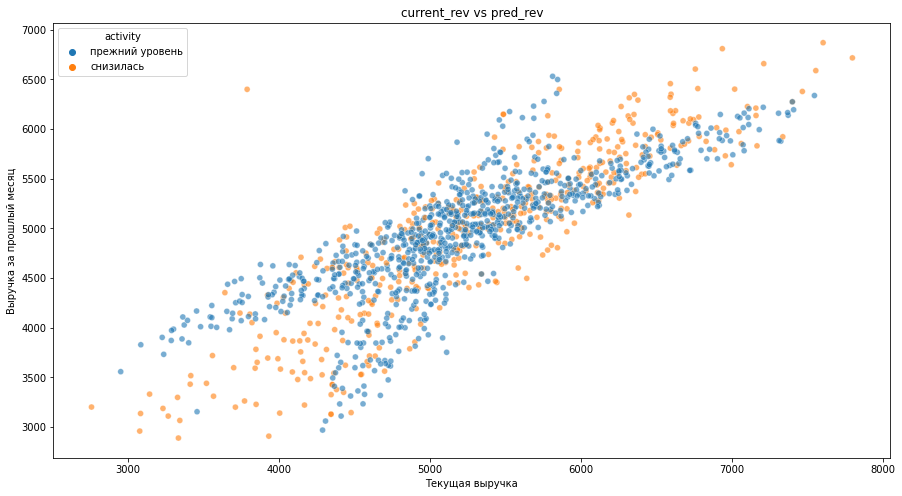

In [73]:
plt.figure(figsize=(15, 8))
sns.scatterplot(
    data=data, 
    x='current_rev', 
    y='pred_rev',
    hue='activity',
    alpha=0.6
)
plt.title('current_rev vs pred_rev')
plt.xlabel('Текущая выручка')
plt.ylabel('Выручка за прошлый месяц')
plt.show()

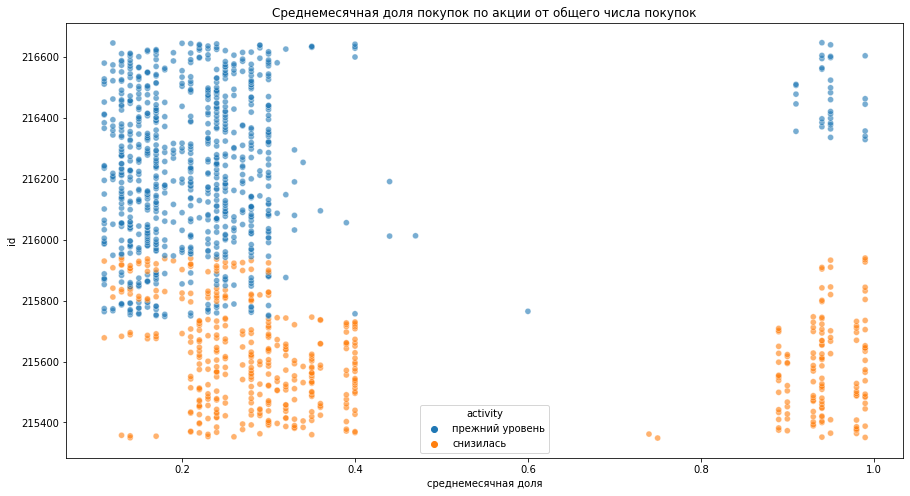

In [74]:
plt.figure(figsize=(15, 8))
sns.scatterplot(
    data=data, 
    x='promo_purchases', 
    y='id',
    hue='activity',
    alpha=0.6
)
plt.title('Cреднемесячная доля покупок по акции от общего числа покупок')
plt.xlabel('среднемесячная доля')
plt.ylabel('id')
plt.show()

<div style="background-color:aquamarine; color:#black; text-align:left; padding:2%">
<font size="4", color= "black"><b>Результат:</b> Признаки `pred_rev` (выручка предыдущего месяца) и `current_rev` (выручка текущего месяца) - мультиколлинеарны (значение в диапазоне 0.8–0.9). Но для нас важны оба этих признака, поэтому оставим их, а в дальнейшем посчитаем суммарную выручку и будем работать с ней.
    
Посмотрев scatter_plot между id и акционными покупками/таргетом мы заметили, что покупки по акции совершали в основном новые покупатели и при этом их покупательская активность не снижается.

Если посмотреть разницу между выручками (предыдущей и текущей), и нанести их на  scatter_plot, в разбивке по таргету можно увидеть, что имеется сильная линейная зависимость: выручка прошлого месяца (pred_rev) отлично предсказывает выручку текущего месяца (current_rev). В выборке реально существуют два сегмента клиентов с чуть разными зависимостями:
- Стабильные клиенты (синие) сохраняют примерно тот же уровень выручки от месяца к месяцу.
- Клиенты с пониженной активностью (оранжевые) показывают «сдвиг» вниз: их прошлые продажи ниже современных для той же группы по текущей выручке </font>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:


Я бы заметил что для клиентов со средними значениями id,  вообще не было акционных покупок.  Можно было подумать что индекс клиента как-то связан с временем когда он стал   клиентом, но это не бьётся с признаком "длительности". так что на этом графике мы можем обнаружить что наш датасет синтетический. это подтверждает   и то что если мы в качестве признака используем индекс клиента, то наш прогноз торговой активности будет 100% по точности (но мы же понимаем что торговая активность не может зависеть от индекса)


<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:



     Однако, мультиколлинеарность не с целевым признаком и не превышает значение 0.9, поэтому ничего делать не будем.


мультиколлинеарности действительно нет,  но стоит разобраться что это такое. Формулировка показывает что ты не очень точно это представляешь

    
    
    

<div class="alert alert-warning">


Совет 🤔:






 

- Можно c помощью scatter_plot сконцентрироваться на связи между выручка текущая - выручка за прошлый. Там явная линейная зависимость, причем как будто бы множество точек тяготеют к двум прямым. Можно поискать факторы которые описывает эти два разных множества. Можно к выручке за прошлый месяц добавить выручку за позапрошлый месяц (или отнять) и тогда в каких то группировках по категориальным признакам будет очень четкая линейная зависимость достигающая по r2 за 0.9. Из этого можно сделать вывод что  в определенных группировках, зависимость между выручками за разные периоды практически дерерминирована (очень высокий показатель r2), то есть из выручки за прошлый (и с учетом позапрошлого месяца) мы можем точно спрогнозировать расходы клиента за текущий месяц. О чем это может говорить? 

    
- Можно посмотреть scatter_plot между id и акционными покупками/таргетом. Можно кое что интересное увидеть и дать этому обьяснение


- Можно взять разницу между выручками, и нанести их на  scatter_plot, в разбивке по таргету и увидеть ещё что-то более интересное  

<div class="alert alert-info"> <b>Комментарии студентаV1:</b> Разобрался, вывод исправил. Дополнительно построил scatter_plot. <br>
Мультиколлинеарность — это когда два и более признаков (столбца) в данных сильно «перекрываются» по информации и оказываются линейно зависимыми друг от друга.</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Верно,  мультиколлинеарность - это только про признаки. Высокая корреляция признака с таргетом - это не мультиколлинеарность, и конечно это не проблема это только плюс, ведь это говорит что у нас качественные признаки и мы сможем построить хорошую модель


 

## Использование пайплайнов

<div style="background-color:lavender; color:#black; text-align:left; padding:2%">
<font size="4", color= "black">6.1 Во время подготовки данных используем ColumnTransformer. Количественные и категориальные признаки обработаем в пайплайне раздельно. Для кодирования категориальных признаков используем как минимум два кодировщика, для масштабирования количественных — как минимум два скейлера.</font>

In [75]:
X = data.drop(['activity'], axis=1)
y = data['activity']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state = RANDOM_STATE,
    stratify=y
)

ohe_columns = [
    'type_service',
    'popular_category'
]
ord_columns = [
    'reporting'
]
num_columns = [
    'active_6m', 'active_current', 'duration', 'promo_purchases',
    'views_visit', 'unpaid_pcs', 'service_error', 'pages_visit',
    'pred_rev', 'predpr_rev', 'current_rev', 'pred_min', 'current_min'
]

In [76]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [77]:
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label mapping:", mapping)

Label mapping: {'прежний уровень': 0, 'снизилась': 1}


In [78]:
if mapping.get('снизилась') == 0:
    # можно инвертировать
    y_train_enc = 1 - y_train_enc
    y_test_enc  = 1 - y_test_enc
    mapping = {k: 1 - v for k, v in mapping.items()}
print("Inverted mapping:", mapping)

Inverted mapping: {'прежний уровень': 0, 'снизилась': 1}






<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет:

 

- использован LabelEncoder, но не хватает проверки, что у нас закодировал с нулём а что единицей. А это важная информация, без неё корректно не проанализировать shap, и не понять какой столбец в predict_proba это "снизилась". Какие могут быть сложности если пропустить этот момент?! Когда у нас бинарная классификация, то метрики presicion, recall, f1 (для accuracy, roc-auc тут без разницы) считаются толко по положительному классу.  Положительный класс - это тот класс который нас больше интересует.  Если мы за этим не проследим,  и метрики не по тому классу посчитаются, и scoring при подборе гиперпараметров может делаться не по тому классу что нас интересует. Кроме того,  predict_proba возвращает два столбцы, если мы  закодируем нужный класс единичкой, то будем точно знать что его вероятность это второй столбец. Вот такая путаница и проблемы могут возникнуть...Нам это надо!?   
  
	
- константа лучше оставлять сразу после импортов библиотек, как их легче будет контролировать и изменять при надобности
  
	

<div class="alert alert-info"> <b>Комментарии студентаV1:</b> Исправил</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



👍


 
<div class="alert alert-warning">


Совет 🤔:


 
    
    if mapping.get('снизилась') == 0:
    # можно инвертировать
    y_train_enc = 1 - y_train_enc
    y_test_enc  = 1 - y_test_enc
    mapping = {k: 1 - v for k, v in mapping.items()}
    print("Inverted mapping:", mapping)
    
    
Можно заставить LabelEncoder кодировать как нам надо    

In [79]:
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='error', sparse_output =False)
        )
    ]
) 

In [80]:
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',  
            OrdinalEncoder(
                categories=[
                    ['да', 'нет']
                ], 
                handle_unknown='error'
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)

In [81]:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', StandardScaler(), num_columns)
    ],
    remainder='passthrough'
)

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:


- pipelines + ColumnTransformer + подбор гиперпараметров 
- 'passthrough' не забыт
- drop='first’ указан
- 2 способа масштабирование и кодирования

 
 
 

<div class="alert alert-warning">


Совет 🤔:


 

 
- для расширения кругозора: GridSearch/RandomizedSearch это классика, но есть и другие варианты подбора гиперпараметров, можешь [ознакомиться](https://www.freecodecamp.org/news/hyperparameter-optimization-techniques-machine-learning/) 
 

<div class="alert alert-info"> <b>Комментарии студентаV1:</b> Спасибо, Марат!</div>

In [82]:
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ]
)

<div style="background-color:lavender; color:#black; text-align:left; padding:2%">
<font size="4", color= "black">6.2. Обучим четыре модели: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и  SVC(). Для каждой из них подберем как минимум один гиперпараметр.</font>

In [83]:
param_grid = [
    # словарь для модели KNeighborsClassifier()
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 10),
        'models__weights': ['uniform', 'distance'],
        'models__algorithm': ['auto','ball_tree','kd_tree'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 10),
        'models__max_features': range(2, 10),
        'models__class_weight': ['balanced', None],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    
    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE,
            solver='liblinear',
            penalty='l1'
        )],
        'models__C': range(1, 10),
        'models__class_weight': ['balanced', None],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    
    # словарь для модели SVC
    { 
        'models': [SVC(random_state=RANDOM_STATE, probability= True)],
        'models__C': range(1, 10),
        'models__kernel': ['rbf', 'linear', 'sigmoid'],
        'models__class_weight': ['balanced', None],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']}
]

<div style="background-color:lavender; color:#black; text-align:left; padding:2%">
<font size="4", color= "black">6.3. При прогнозе активности покупателей у нас всего два класса, поэтому задача бинарная и для нее вполне подойдет метрика ROC_AUC. Потому что:
    
- не зависит от порога,
- хорошо отражает качество ранжирования положительного/отрицательного классов,
- устойчива к умеренному дисбалансу.</font>

In [84]:
%%time

randomized_search = RandomizedSearchCV(
    estimator=pipe_final,
    param_distributions=param_grid,
    cv=5,
    scoring={
        'roc_auc':    'roc_auc',
        'precision':  'precision',
        'recall':     'recall',
        'f1':         'f1'
    },
    refit='roc_auc',                 # по этой метрике будет подбираться лучшая модель
    verbose=3,                       # подробный вывод процесса
    random_state=RANDOM_STATE,
    n_jobs=-1
)

randomized_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END models=SVC(probability=True, random_state=42), models__C=2, models__class_weight=None, models__kernel=rbf, preprocessor__num=StandardScaler(); f1: (test=0.845) precision: (test=0.882) recall: (test=0.811) roc_auc: (test=0.921) total time=   0.1s
[CV 2/5] END models=SVC(probability=True, random_state=42), models__C=2, models__class_weight=None, models__kernel=rbf, preprocessor__num=StandardScaler(); f1: (test=0.857) precision: (test=0.983) recall: (test=0.760) roc_auc: (test=0.920) total time=   0.1s
[CV 3/5] END models=SVC(probability=True, random_state=42), models__C=2, models__class_weight=None, models__kernel=rbf, preprocessor__num=StandardScaler(); f1: (test=0.818) precision: (test=0.889) recall: (test=0.757) roc_auc: (test=0.899) total time=   0.1s
[CV 4/5] END models=SVC(probability=True, random_state=42), models__C=2, models__class_weight=None, models__kernel=rbf, preprocessor__num=StandardScaler(); f1: (t

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              sparse_output=False))]),
                                                                               ['type_service',
                                                                                'popular_category']),
                                                                              ('ord',
                                                                               Pipeline(steps=[('simpleImputer_before_or...
                                        {'models': [SVC(probability=True,
                                                        random_state=42)],
                                         'models__C': range(1, 10),
                                         'models__class_weight': ['balanced',
                                                                  None],
                                         'models__kernel': ['rbf', 'linear',
                                                            'sigmoid'],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, refit='roc_auc',
                   scoring={'f1': 'f1', 'precision': 'precision',
                            'recall': 'recall', 'roc_auc': 'roc_auc'},
                   verbose=3)

In [85]:
results = pd.DataFrame(randomized_search.cv_results_)

print("Все колонки в cv_results_:\n", list(results.columns))

mean_cols = [c for c in results.columns if c.startswith('mean_test')]
rank_cols = [c for c in results.columns if c.startswith('rank_test')]

print("\nmean-колонки:\n", mean_cols)
print("\nrank-колонки:\n", rank_cols)

table = results[['params'] + rank_cols + mean_cols]
table_sorted = table.sort_values(rank_cols[0])

display(table_sorted)

Все колонки в cv_results_:
 ['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_preprocessor__num', 'param_models__kernel', 'param_models__class_weight', 'param_models__C', 'param_models', 'param_models__max_features', 'param_models__max_depth', 'param_models__weights', 'param_models__n_neighbors', 'param_models__algorithm', 'params', 'split0_test_roc_auc', 'split1_test_roc_auc', 'split2_test_roc_auc', 'split3_test_roc_auc', 'split4_test_roc_auc', 'mean_test_roc_auc', 'std_test_roc_auc', 'rank_test_roc_auc', 'split0_test_precision', 'split1_test_precision', 'split2_test_precision', 'split3_test_precision', 'split4_test_precision', 'mean_test_precision', 'std_test_precision', 'rank_test_precision', 'split0_test_recall', 'split1_test_recall', 'split2_test_recall', 'split3_test_recall', 'split4_test_recall', 'mean_test_recall', 'std_test_recall', 'rank_test_recall', 'split0_test_f1', 'split1_test_f1', 'split2_test_f1', 'split3_test_f1', 'split4_test_f1', 'mean_te

,params,rank_test_roc_auc,rank_test_precision,rank_test_recall,rank_test_f1,mean_test_roc_auc,mean_test_precision,mean_test_recall,mean_test_f1
0,"{'preprocessor__num': StandardScaler(), 'model...",1,1,4,1,0.91,0.93,0.75,0.83
5,"{'preprocessor__num': StandardScaler(), 'model...",2,2,2,2,0.90,0.90,0.76,0.82
1,"{'preprocessor__num': 'passthrough', 'models__...",3,4,3,3,0.89,0.86,0.75,0.80
2,"{'preprocessor__num': MinMaxScaler(), 'models_...",4,6,1,4,0.89,0.83,0.77,0.80
7,"{'preprocessor__num': MinMaxScaler(), 'models_...",5,5,6,5,0.82,0.84,0.72,0.77
3,"{'preprocessor__num': 'passthrough', 'models__...",6,3,9,7,0.81,0.88,0.66,0.75
6,"{'preprocessor__num': MinMaxScaler(), 'models_...",7,8,8,8,0.80,0.76,0.70,0.72
8,"{'preprocessor__num': MinMaxScaler(), 'models_...",8,7,5,6,0.80,0.81,0.73,0.77
4,"{'preprocessor__num': StandardScaler(), 'model...",9,9,7,9,0.79,0.66,0.71,0.68
9,"{'preprocessor__num': 'passthrough', 'models__...",10,10,10,10,0.59,0.55,0.26,0.34


In [86]:
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика по кросс валидацинной выборке:', randomized_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['type_service',
                                                   'popular_category']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                      


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



👍




<div class="alert alert-warning">
 


Совет 🤔:

 

- Полезно замерить время исполнения кода в самых тяжёлых ячейке, это можно сделать с помощью магической функции %%time или библиотеки time. И тогда коллеге работающие с твоим кодом будут ориентироваться сколько займёт время обучение модели. И стоит ждать или можно попить чайку )
    
           
- Можно разговорить модельку с помощью подачи verbose = 3 (Чтобы отслеживать процессы обучения в режиме онлайн), а чтобы выводилось не только метрика   по которой ты подбираешь гиперпараметры, но целый список из метрик (может  добавить scoring=['Метрика', '', ''...], а через refit   указать по какой метрике подбираются гиперпараметры )     
     
	
- Перед тем как проводить финальное тестирование, можно заглянуть в  cv_results_, и вытащить полезную информацию.  Например о  лучших метриках на кросс валидации у других моделей, время обучения моделей на лучших гиперпараметрах, время прогнозирования. Неплохо попрактиковаться, ведь нас вполне могут попросить сделать выбор лучшей модели не только по метрике, но и с учётом скорости модели    
        
    
     
    

    
	Метрика лучшей модели на тренировочной выборке: 0.9089512322239595
	
    
- Это звучит  не очень хорошо с точки зрения теории. Ведь .best_score_ это метрика по кросс валидацинной выборке а не на тренировочной. Мы не выбираем лучшую модель по результату на тренировочный выборке, потому что она ничего не показывает. Например если взять дерево решение достаточно большой глубины, то метрика на тренировочной будет равна 100%, но это результат запоминание данных, а не обобщения. Раньше был проект "ведения машинное обучение", где чётко об этом рассказывалось - обучаемся на train, гиперпараметры подбираем по валидационной выборке (в случаи GS кроссвалидационной), а затем проводим финальное тестирование. В прежнем проекте студенты вручную разбивали на три выборки и в цикле подбирали гиперпараметры, а сейчас сразу GS, но он делает то же самое: ты подаёшь него X_train, и он внутри себя разбивает его на тренировочную и валидационную (причем несколько раз)... Можешь посмотреть [тут](https://towardsdatascience.com/why-do-we-need-a-validation-set-in-addition-to-training-and-test-sets-5cf4a65550e0) с помощью VPN о логике использования выборок. Может конечно не исправлять,  но хотя бы обрати внимание на логику использования выборок,  и как работает RandomizedSearchCV/GridSearchCV 	
	
	 
 
    

<div class="alert alert-info"> <b>Комментарии студентаV1:</b> Дополнил</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



👍


Только я бы не советовал использовать cv_results_ так.  Лучше найти там лучшие метрики, время обучения, лучшие гиперпараметры  для четырёх моделей (Логистическая, Дерево решений...). Вот это было бы информативно

In [87]:
y_proba = randomized_search.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_proba)
print("ROC AUC на тесте:", auc)

ROC AUC на тесте: 0.9125712898920034


<div style="background-color:aquamarine; color:#black; text-align:left; padding:2%">
<font size="4", color= "black"><b>Результат:</b> Лучшая модель SVC(C=2, probability=True, random_state=42). Значение метрики ROC_AUC на тесте = 0.91</font>


<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:






 
    
Метрика подсчитано верно, но предварительно стоит обосновать  выбор    (тут можно либо подчеркнуть преимущества выбранной метрики, либо увязать с бизнес-постановкой задачи. С точки зрения бизнеса какая Метрика на твой взгляд важнее  recall или precision на классе "снизилась"?)  



<div class="alert alert-warning">
 

Совет:

 


- вопросик: указав scoring='roc_auc', чего мы добиваемся? И будет ли по-разному обучаться модель, если мы укажем другую метрику в  scoring?

 


<div class="alert alert-info"> <b>Комментарии студентаV1:</b> Обоснование метрики исходя из задачи выявления «снизившихся» клиентов:</b>

- Recall измеряет, какую долю реально «снизившихся» клиентов мы успели найти.
- Precision показывает, какую долю из тех, кого мы пометили «снизившимися», составляют действительно ушедшие клиенты.
- ROC AUC оценивает общую способность модели правильно ранжировать клиентов по риску «снижения», не привязываясь к конкретному порогу. Проще говоря, ROC AUC — это вероятность того, что случайно выбранный ушедший клиент получит более высокий прогноз вероятности оттока, чем случайно выбранный лояльный. Для бизнеса это важно, потому что: мы можем отрегулировать порог под балансовый бюджет удержания, зная, что при любом выбранном пороге модель сохраняет хорошую дискриминацию. ROC AUC позволяет сравнивать разные алгоритмы и настройки ещё до того, как мы остановимся на конкретном threshold’е и углубимся в Precision/Recall. </b>

<b>Таким образом:</b>

ROC AUC — глобальная метрика ранжирования, дающая уверенность, что модель стабильно отделяет «снизившихся» от «активных» на всём диапазоне чувствительности.</b>

<b>Ответик на вопросик: </b>
1) указав scoring='roc_auc', чего мы добиваемся? Включение параметра scoring='roc_auc' в RandomizedSearchCV задаёт критерий, по которому будут отбираться лучшие гиперпараметры, но не меняет сам алгоритм обучения модели. Если же мы укажем другую метрику (например, precision или recall), процесс .fit() останется тем же, однако поиск будет выбирать те параметры, которые максимизируют именно эту новую метрику на валидационных фолдах. </b>

2) И будет ли по-разному обучаться модель, если мы укажем другую метрику в  scoring? При выборе другой метрики процесс fit остаётся тем же, но выбор лучших параметров будет основываться на новой метрике
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Верно


 

## Анализ важности признаков

<div style="background-color:lavender; color:#black; text-align:left; padding:2%">
<font size="4", color= "black">Оценим важность признаков для лучшей модели и построим график важности с помощью метода SHAP</font>

In [88]:
%%time

X_train_shap = pd.DataFrame(
    pipe_final.named_steps['preprocessor'].fit_transform(X_train), 
    columns= pipe_final.named_steps['preprocessor'].get_feature_names_out()
)
X_test_shap = pd.DataFrame(
    pipe_final.named_steps['preprocessor'].transform(X_test), 
    columns= pipe_final.named_steps['preprocessor'].get_feature_names_out()
)

model = SVC(C=2, probability=True, random_state=42)
model.fit(X_train_shap, y_train)

background = X_train_shap.iloc[:20]
explainer = shap.KernelExplainer(model.predict_proba, background)
shap_values = explainer(X_test_shap[:20])

  0%|          | 0/20 [00:00<?, ?it/s]

CPU times: user 20.4 s, sys: 2.41 s, total: 22.8 s
Wall time: 22.9 s


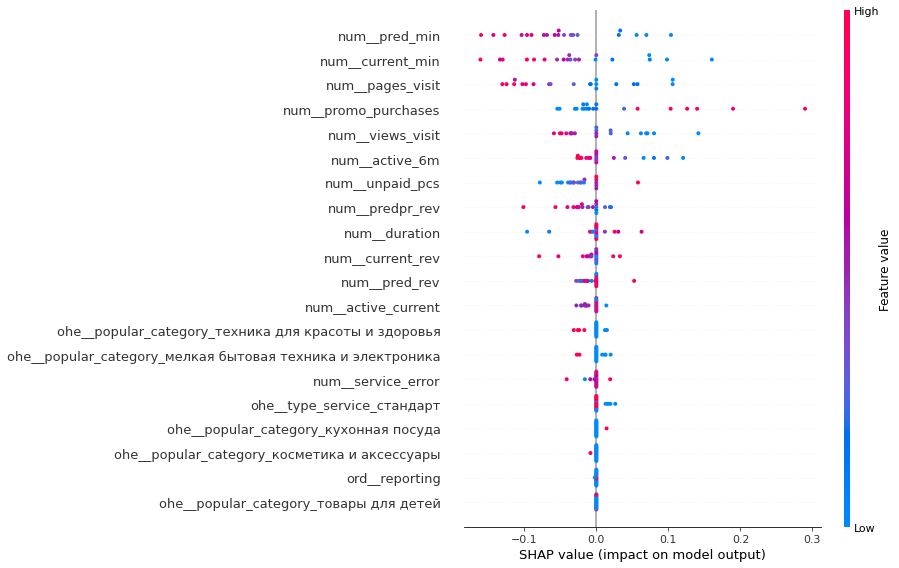

In [89]:
shap.plots.beeswarm(shap_values[:,:,1], max_display = 20)

 
<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:

 
 
 

beeswarm построен, теперь надо его проанализировать,  ведь он нам еще подсказывает направление связи между признаками и таргетом

 


<div class="alert alert-warning">
 


Совет 🤔:


- Насколько презентативно строить shap и делать выводы по какой выборке? Понимаю что KernelExplainer это очень медленно, но предлагаю найти другое решение.  Попробуй по-другому поработать с логистической регрессией чтобы она оказалась лучшей (LinearExplainer быстро отработает на всех данных, и результаты будут очень наглядными),  либо достань .cv_result_ Логистическую регрессию с лучшими гиперпараметрами, и подай её в shap/либо используй pipeline отдельно для каждой модели
 
 
Либо попробуй использовать SamplingExplainer, это будет лучше чем использовать ручное сэмплирование

 

<div class="alert alert-info"> <b>Комментарии студентаV1:</b> Что повышает риск оттока — шаги для немедленного контроля:</b>

- Высокие значения количественных метрик num__pred_min, num__current_min, num__pages_visit, num__promo_purchases, num__views_visit, num__duration, num__pred_rev, num__current_rev, num__active_6m, num__active_current</b>

- Низкие значения проблемных индикаторов (парадоксальный вывод) num__unpaid_pcs, num__service_error показывают: чем меньше неоплат и ошибок, тем сильнее модель верит в отток. Возможное объяснение: у «спокойных» клиентов нет триггеров, заставляющих их активно коммуницировать с сервисом — они тихо уходят.</div>


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:


 

Возможно из-за сэмплирования, но вывод у тебя получился не самый понятный. Но кое-что всё-таки видно. beeswarm позволяет оценить направление связи между признаком и таргетом. Как видишь на правой стороне (а это лейбл один - снизилось) у нас акционные покупки красные, о чём это говорит? А это значит что более высокие значения акционных продаж по мнению модели приводит к увеличению вероятности "снизилась". А например время проведённое на сайте и количество просмотров с правой стороны - синие. А это значит наоборот -   чем больше просмотров тем выше вероятность сохранения активности. Что весьма Логично.  Большое процент неуплат тоже по мнению модели к снижению активности

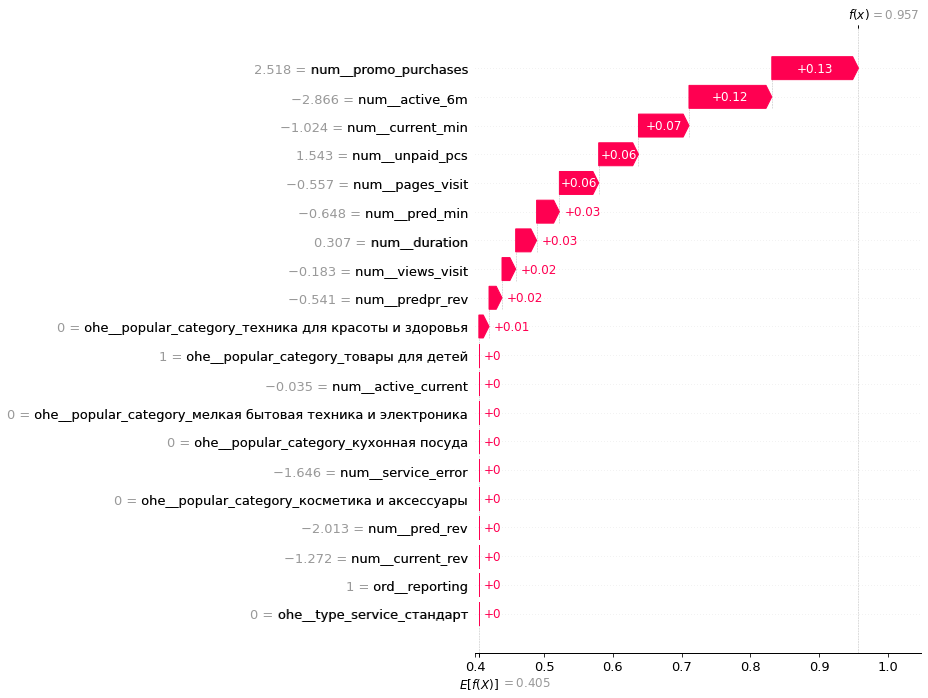

In [90]:
shap.plots.waterfall(shap_values[1,:,1], max_display = 20)

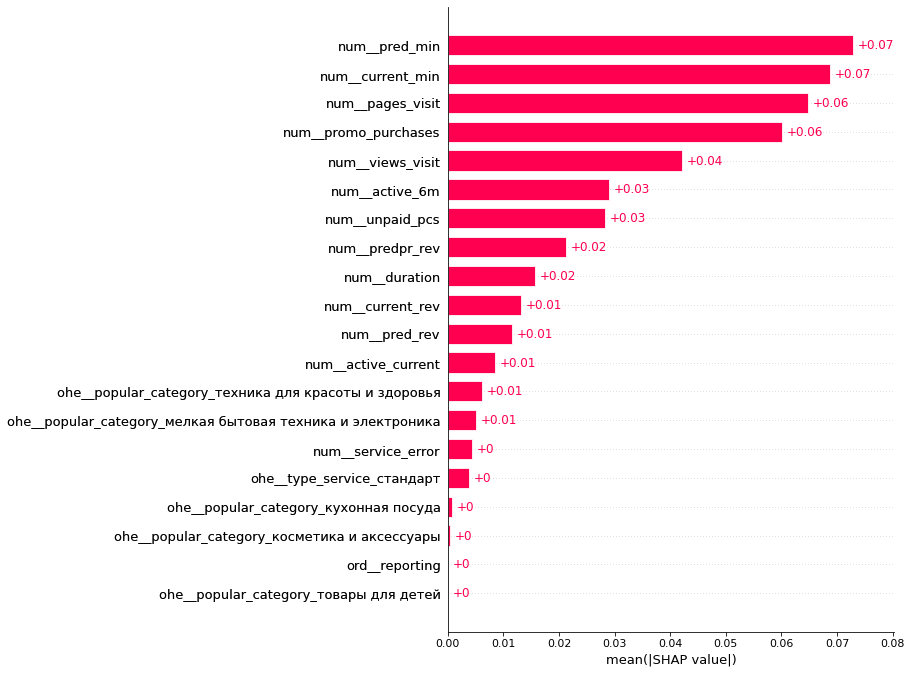

In [91]:
shap.plots.bar(shap_values[:, :, 1], max_display=21)

<div style="background-color:aquamarine; color:#black; text-align:left; padding:2%">
<font size="4", color= "black"><b>Результат:</b> с точки зрения модели наиболее важными признаками для прогноза активности являются:

- мало значимы для модели: 
    - популярные категории (popular_category), 
    - разрешить сообщать (reporting)
    - тип сервиса (type_service) и это меня удивило)
- сильнее всего влияют на целевой признак: 
    - время, проведенное на сайте (current_min, pred_min) и это логично,
    - количество просмотренных за визит категорий и страниц (pages_visit, views_visit),
    - промо-акции (promo_purchases),
    - не оплаченные покупки (unpaid_pcs),
    
Можно использовать эти наблюдения при моделировании и принятии бизнес-решений:
- в части моделирования:
    - popular_category, reporting и type_service имеет смысл исключить из модели
    - использовать feature engineering для создания новых признаков
- в части бизнес-решений:
    - развивать контент-модули, рекомендуемые товары и статьи, чтобы затягивать пользователей (увеличить current_min и pred_min)
    - внедрить напоминания по e-mail или push-уведомления о незавершённых покупках, упростить процесс оплаты: один клик, автозаполнение реквизитов, поддержка популярных платёжных систем для снижения количества не оплаченных покупок (unpaid_pcs)
    - улучшить метрику views_visit - разместите на страницах «схожие товары» и «может понравиться», призывая к просмотру дополнительных карточек, применять персонализацию: выдача продуктов на основе истории просмотров/покупок
    - анализировать, какие типы акций (скидки, купоны, бесплатная доставка) приводят к росту конверсии, и масштабировать наиболее эффективные (promo_purchases)</font>

  
    
<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



- есть график важности факторов, график аккуратный
    
    
- есть выводы о том, какие факторы сильнее/слабее влияют
    
	
- плюс за использование .beeswarm,  ведь он даёт гораздо больше информации    
    
    
    
<div class="alert alert-warning">


Совет 🤔:
   
 
     
- не стоит писать как будто есть причино - следственные связи между какими то признаками и таргетом, которые мы выявили с помощью shap. Тут стоит писать: "с точки зрения модели наиболее важными признаком для прогноза активности...".  Простой пример -  например мы выявили что чем больше поломок, тем больше вероятность сохранение активности на прежнем уровне. Значит ли что нам стоит ломать свой сайт? Нет.  Всё дело что число поломок выступает в качестве индикатора активности клиента, и сильного желания совершить покупку. То есть это индикатор, а не причина.  Вот такой моментик 

 
	
- можно и по-другому оценить важность признаков, это можно сделать с помощью [.feature_importance](https://inria.github.io/scikit-learn-mooc/python_scripts/dev_features_importance.html) (но не забываем что в логистической регрессии надо учесть логарифм в функция ошибки). Или с помощью [Permutation Importance](https://scikit-learn.org/stable/modules/permutation_importance.html) Если сделать, то должно получиться что-то похожее	
	
 
  



<div class="alert alert-info"> <b>Комментарии студентаV1:</b> Поправил</div>

## Сегментация покупателей

<div style="background-color:lavender; color:#black; text-align:left; padding:2%">
<font size="4", color= "black">Выполним сегментацию покупателей. Будем использовать результаты моделирования и данные о прибыльности покупателей. Учтем рекомендации в самом задании.</font>

In [92]:
money.set_index('id', inplace=True)

In [93]:
predicted = randomized_search.predict_proba(X_test)[:, 1]
X_test = X_test.copy()
X_test['predicted'] = predicted

#segment = X_test.merge(money, left_on='id', right_index=True)
segment = X_test.join(money)

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:


Не нашел где была сделана проверка что .predict_proba(X)[:, 1], это вероятность "снизилась". 
Поясню. Если не закодировать текстовый Таргет в цифры, то модель  сделает  это самостоятельно(По своему внутреннему алгоритму). Но нам нужно получить эту информацию, ведь если  если модель закодировала "снизилась" единицей, тогда вероятность "снизилась" это .predict_proba(X)[:, 1], а если нулём то вероятность "снизилась" это .predict_proba(X)[:, 0]
Так что либо смотрим либо  самостоятельно кодируем target в цифры

Если модель закодировала "снизилась" единицей, тогда на beeswarm  "снизилась" это правая сторона, а если нулём то вероятность "снизилась" это левая сторона графика


<div class="alert alert-info"> <b>Комментарии студентаV1:</b> Сделал это выше (строки 77-78)</div>

In [94]:
segment = segment.copy()
segment['revenue'] = (
    segment['current_rev']
  + segment['pred_rev']
  + segment['predpr_rev']
)
segment['profit_rub'] = (segment['revenue'] * segment['profit'])/100

In [95]:
print(segment.head(2))

       type_service reporting  active_6m  active_current  duration  \
id                                                                   
216161     стандарт        да       4.10               4       606   
215654      премиум       нет       1.40               4       684   

        promo_purchases                popular_category  views_visit  \
id                                                                     
216161             0.15  техника для красоты и здоровья            6   
215654             0.94                товары для детей            3   

        unpaid_pcs  service_error  pages_visit  pred_rev  predpr_rev  \
id                                                                     
216161           1              4           12  3,973.00    4,912.00   
215654           6              1            6  3,548.00    4,656.00   

        current_rev  pred_min  current_min  predicted  profit   revenue  \
id                                                                

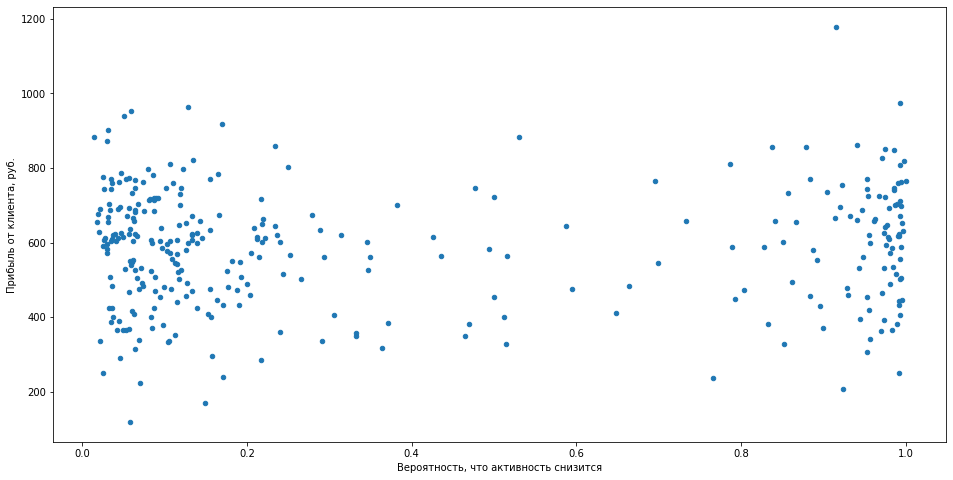

In [96]:
segment.plot.scatter(
    x = 'predicted', 
    y = 'profit_rub', 
    figsize=(16, 8)
)
plt.xlabel('Вероятность, что активность снизится')
plt.ylabel('Прибыль от клиента, руб.')
plt.show()

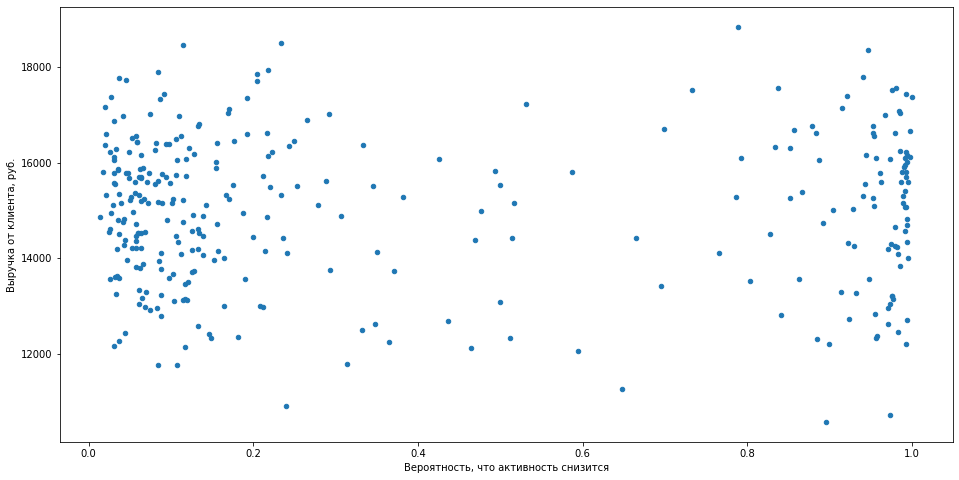

In [97]:
segment.plot.scatter(
    x = 'predicted', 
    y = 'revenue', 
    figsize=(16, 8)
)
plt.xlabel('Вероятность, что активность снизится')
plt.ylabel('Выручка от клиента, руб.')
plt.show()

<div style="background-color:lavender; color:#black; text-align:left; padding:2%">
<font size="4", color= "black">Рассмотрим сегмент клиентов с высокой вероятностью снижения покупательской активности и наиболее высокой прибыльностью за период.</font>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



Хороший сегмент


 

In [98]:
profit_rub_mean = segment['profit_rub'].mean()

In [99]:
segment_low = segment.loc[
    (segment['predicted'] >= 0.6) &
    (segment['profit_rub'] >= profit_rub_mean),
    :
].copy()

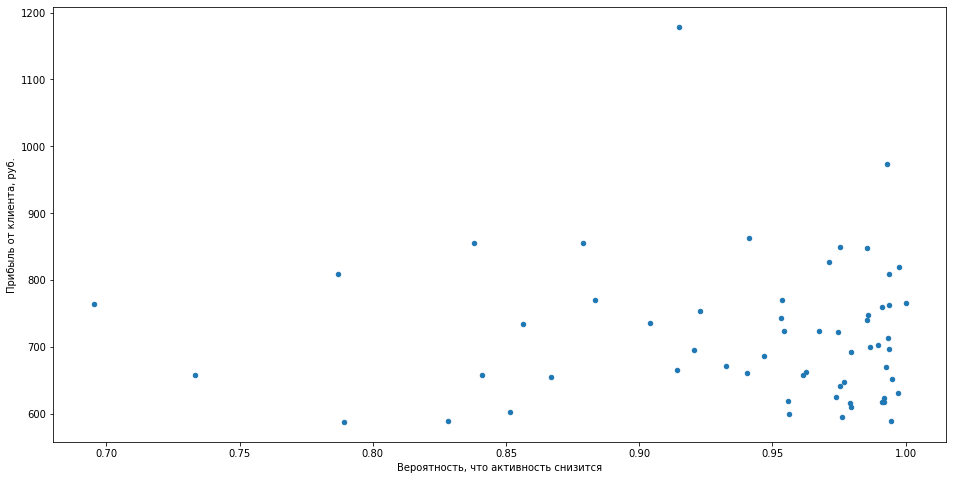

In [100]:
segment_low.plot.scatter(
    x = 'predicted', 
    y = 'profit_rub', 
    figsize=(16, 8)
)
plt.xlabel('Вероятность, что активность снизится')
plt.ylabel('Прибыль от клиента, руб.')
plt.show()

In [101]:
segment_low.reset_index(drop=True).phik_matrix().style.background_gradient(cmap='coolwarm')

interval columns not set, guessing: ['active_6m', 'active_current', 'duration', 'promo_purchases', 'views_visit', 'unpaid_pcs', 'service_error', 'pages_visit', 'pred_rev', 'predpr_rev', 'current_rev', 'pred_min', 'current_min', 'predicted', 'profit', 'revenue', 'profit_rub']


,type_service,reporting,active_6m,active_current,duration,promo_purchases,popular_category,views_visit,unpaid_pcs,service_error,pages_visit,pred_rev,predpr_rev,current_rev,pred_min,current_min,predicted,profit,revenue,profit_rub
type_service,1.000000,0.056798,0.000000,0.000000,0.693331,0.000000,0.093502,0.000000,0.343554,0.258324,0.090463,0.000000,0.000000,0.281750,0.357352,0.267480,0.275144,0.000000,0.000000,0.191280
reporting,0.056798,1.000000,0.000000,0.000000,0.196365,0.139706,0.000000,0.000000,0.000000,0.076979,0.000000,0.562406,0.414267,0.415459,0.226022,0.000000,0.000000,0.000000,0.451554,0.000000
active_6m,0.000000,0.000000,1.000000,0.618712,0.270164,0.000000,0.322011,0.000000,0.407272,0.000000,0.141732,0.000000,0.262010,0.290134,0.468496,0.430999,0.543295,0.000000,0.000000,0.449486
active_current,0.000000,0.000000,0.618712,1.000000,0.270503,0.000000,0.000000,0.000000,0.387608,0.530781,0.176032,0.341184,0.191674,0.420534,0.269470,0.457949,0.000000,0.026391,0.000000,0.000000
duration,0.693331,0.196365,0.270164,0.270503,1.000000,0.350402,0.000000,0.000000,0.385287,0.000000,0.000000,0.169717,0.307160,0.485620,0.374749,0.000000,0.000000,0.249307,0.677200,0.405305
promo_purchases,0.000000,0.139706,0.000000,0.000000,0.350402,1.000000,0.292362,0.000000,0.000000,0.390137,0.000000,0.270146,0.000000,0.149544,0.000000,0.000000,0.000000,0.043150,0.000000,0.000000
popular_category,0.093502,0.000000,0.322011,0.000000,0.000000,0.292362,1.000000,0.000000,0.320481,0.353644,0.000000,0.000000,0.000000,0.516195,0.369230,0.174647,0.000000,0.106621,0.371563,0.000000
views_visit,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.350459,0.000000,0.000000,0.307760,0.000000,0.549880,0.000000,0.326333,0.681361,0.390067,0.177022,0.318295
unpaid_pcs,0.343554,0.000000,0.407272,0.387608,0.385287,0.000000,0.320481,0.350459,1.000000,0.187557,0.000000,0.000000,0.171279,0.224627,0.000000,0.461629,0.463167,0.000000,0.282731,0.000000
service_error,0.258324,0.076979,0.000000,0.530781,0.000000,0.390137,0.353644,0.000000,0.187557,1.000000,0.000000,0.245694,0.000000,0.000000,0.000000,0.438394,0.356890,0.000000,0.000000,0.000000


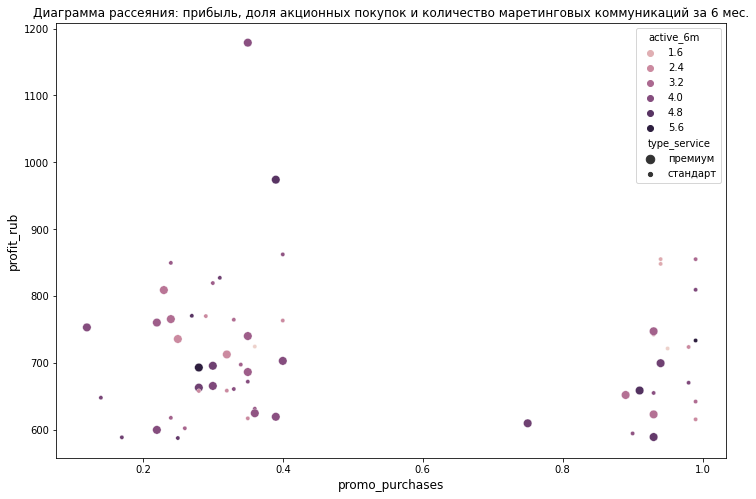

In [102]:
plot_scatter(
    segment_low, 
    x='promo_purchases', 
    hue='active_6m', 
    title='Диаграмма рассеяния: прибыль, доля акционных покупок и количество маретинговых коммуникаций за 6 мес.'
)

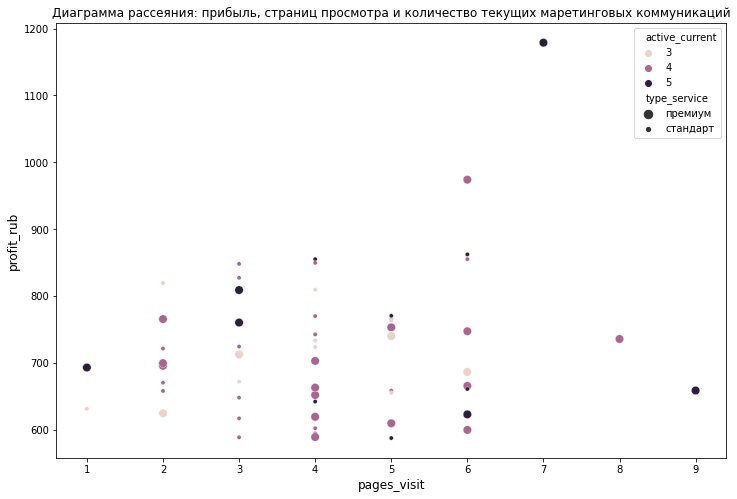

In [103]:
plot_scatter(
    segment_low, 
    x='pages_visit', 
    hue='active_current', 
    title='Диаграмма рассеяния: прибыль, страниц просмотра и количество текущих маретинговых коммуникаций'
)

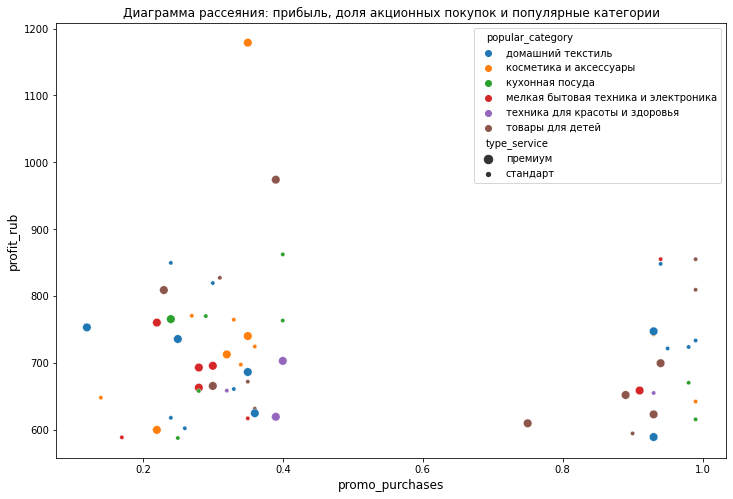

In [104]:
plot_scatter(
    segment_low, 
    x='promo_purchases', 
    hue='popular_category', 
    title='Диаграмма рассеяния: прибыль, доля акционных покупок и популярные категории'
)

<div style="background-color:lavender; color:#black; text-align:left; padding:2%">
<font size="4", color= "black">Рассмтрим сегмент клиентов с низкой вероятностью снижения покупательской активности и наиболее высокой прибыльностью. Что удерживает их?)</font>

In [105]:
segment_high = segment.loc[
    (segment['predicted'] < 0.6) &
    (segment['profit_rub'] >= profit_rub_mean),
    :
].copy()

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



Логичный контр сегмент (Хотя можно было взять < 0.4)


 

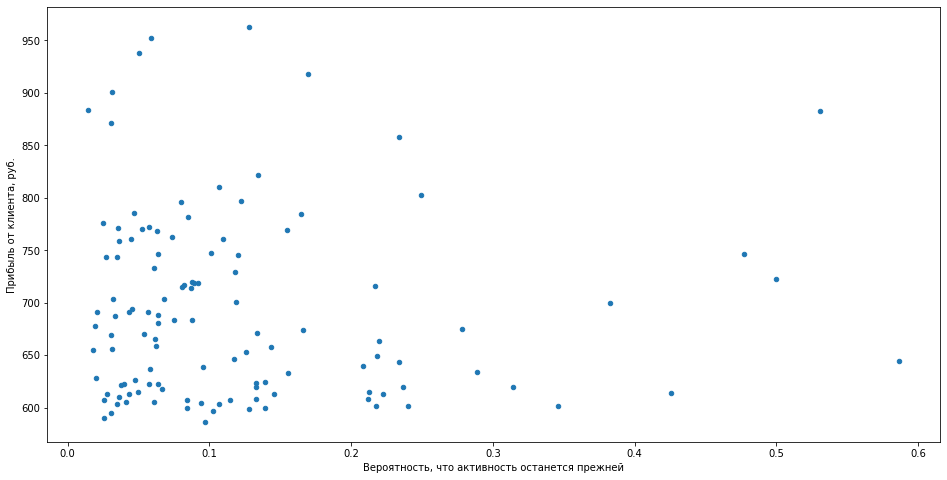

In [106]:
segment_high.plot.scatter(
    x = 'predicted', 
    y = 'profit_rub', 
    figsize=(16, 8)
)
plt.xlabel('Вероятность, что активность останется прежней')
plt.ylabel('Прибыль от клиента, руб.')
plt.show()

In [107]:
segment_high.reset_index(drop=True).phik_matrix().style.background_gradient(cmap='coolwarm')

interval columns not set, guessing: ['active_6m', 'active_current', 'duration', 'promo_purchases', 'views_visit', 'unpaid_pcs', 'service_error', 'pages_visit', 'pred_rev', 'predpr_rev', 'current_rev', 'pred_min', 'current_min', 'predicted', 'profit', 'revenue', 'profit_rub']


,type_service,reporting,active_6m,active_current,duration,promo_purchases,popular_category,views_visit,unpaid_pcs,service_error,pages_visit,pred_rev,predpr_rev,current_rev,pred_min,current_min,predicted,profit,revenue,profit_rub
type_service,1.000000,0.197137,0.165014,0.119971,0.560322,0.082688,0.166939,0.327988,0.000000,0.371166,0.281686,0.092549,0.000000,0.238614,0.000000,0.150222,0.000000,0.000000,0.218299,0.000000
reporting,0.197137,1.000000,0.089324,0.133575,0.211344,0.110230,0.000000,0.243722,0.000000,0.095852,0.000000,0.000000,0.168424,0.279647,0.000000,0.000000,0.205397,0.000000,0.000000,0.000000
active_6m,0.165014,0.089324,1.000000,0.000000,0.128907,0.000000,0.316063,0.051105,0.247118,0.000000,0.353548,0.262992,0.000000,0.365579,0.365004,0.195943,0.373180,0.128898,0.321226,0.000000
active_current,0.119971,0.133575,0.000000,1.000000,0.188200,0.029490,0.266209,0.000000,0.205138,0.392667,0.226029,0.000000,0.000000,0.000000,0.000000,0.256105,0.343337,0.000000,0.278941,0.000000
duration,0.560322,0.211344,0.128907,0.188200,1.000000,0.000000,0.000000,0.000000,0.237021,0.428418,0.222218,0.259833,0.418213,0.421622,0.000000,0.226163,0.312461,0.200717,0.459340,0.285491
promo_purchases,0.082688,0.110230,0.000000,0.029490,0.000000,1.000000,0.000000,0.174154,0.030211,0.107962,0.000000,0.000000,0.000000,0.294616,0.168486,0.000000,0.444919,0.482376,0.000000,0.399667
popular_category,0.166939,0.000000,0.316063,0.266209,0.000000,0.000000,1.000000,0.324994,0.464928,0.139712,0.000000,0.263270,0.000000,0.343946,0.322982,0.000000,0.196184,0.000000,0.172291,0.076791
views_visit,0.327988,0.243722,0.051105,0.000000,0.000000,0.174154,0.324994,1.000000,0.000000,0.196884,0.000000,0.254120,0.081186,0.277459,0.350071,0.230225,0.289019,0.000000,0.000000,0.000000
unpaid_pcs,0.000000,0.000000,0.247118,0.205138,0.237021,0.030211,0.464928,0.000000,1.000000,0.000000,0.187926,0.000000,0.000000,0.000000,0.142112,0.310818,0.334421,0.000000,0.000000,0.357165
service_error,0.371166,0.095852,0.000000,0.392667,0.428418,0.107962,0.139712,0.196884,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.512403,0.226524,0.315211,0.267107,0.000000,0.000000


In [108]:
segment_low = segment_low.copy()
segment_low['rev_promo_low']    = segment_low['revenue'] * segment_low['promo_purchases']
segment_low['rev_nonpromo_low'] = segment_low['revenue'] * (1 - segment_low['promo_purchases'])
rev_by_cat_low = (
    segment_low
    .groupby('popular_category')[['rev_promo_low','rev_nonpromo_low']]
    .sum()
)
order_low = rev_by_cat_low.sum(axis=1).sort_values(ascending=False).index
rev_by_cat_low = rev_by_cat_low.loc[order_low]

segment_high = segment_high.copy()
segment_high['rev_promo_high']    = segment_high['revenue'] * segment_high['promo_purchases']
segment_high['rev_nonpromo_high'] = segment_high['revenue'] * (1 - segment_high['promo_purchases'])
rev_by_cat_high = (
    segment_high
    .groupby('popular_category')[['rev_promo_high','rev_nonpromo_high']]
    .sum()
)
order_high = rev_by_cat_high.sum(axis=1).sort_values(ascending=False).index
rev_by_cat_high = rev_by_cat_high.loc[order_high]

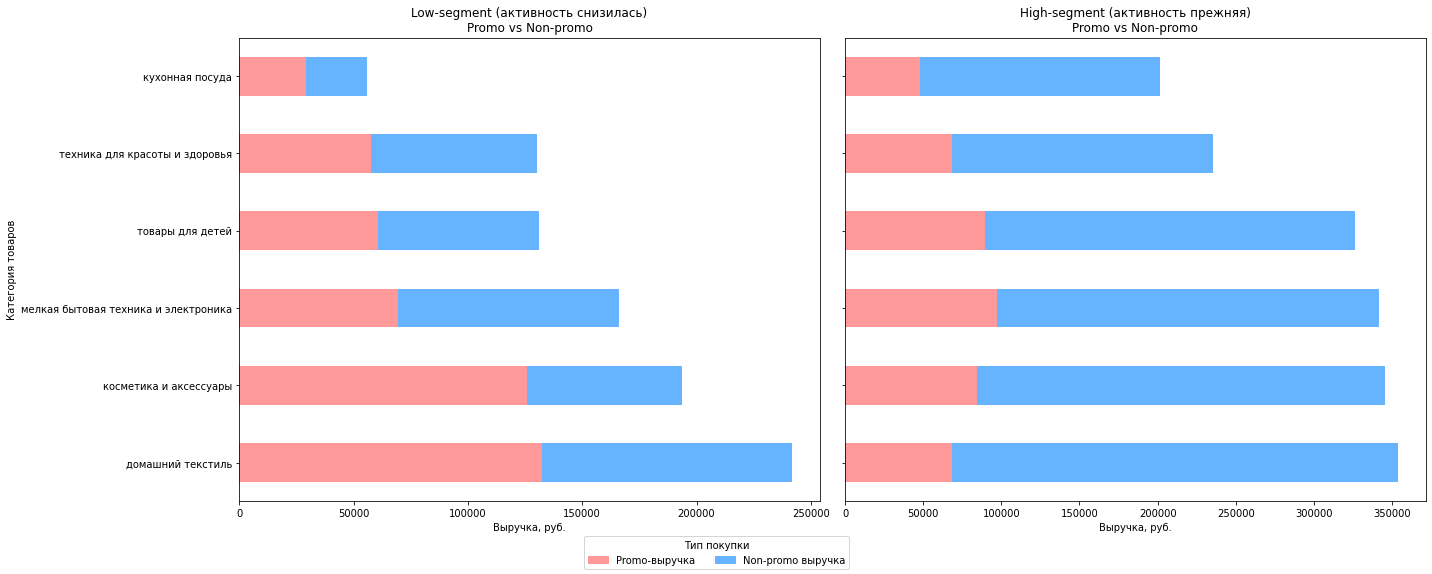

In [109]:
fig, axes = plt.subplots(ncols=2, figsize=(20, 8), sharey=True)

colors = ['#FF9999', '#66B3FF']

rev_by_cat_low.plot(
    kind='barh', stacked=True, ax=axes[0],
    color=colors, legend=False
)
axes[0].set_title('Low-segment (активность снизилась)\nPromo vs Non-promo')
axes[0].set_xlabel('Выручка, руб.')
axes[0].set_ylabel('Категория товаров')

rev_by_cat_high.plot(
    kind='barh', stacked=True, ax=axes[1],
    color=colors, legend=False
)
axes[1].set_title('High-segment (активность прежняя)\nPromo vs Non-promo')
axes[1].set_xlabel('Выручка, руб.')
axes[1].set_ylabel('')

legend_handles = [
    Patch(color=colors[0], label='Promo-выручка'),
    Patch(color=colors[1], label='Non-promo выручка')
]
fig.legend(
    handles=legend_handles,
    title='Тип покупки',
    loc='lower center',
    ncol=2
)

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

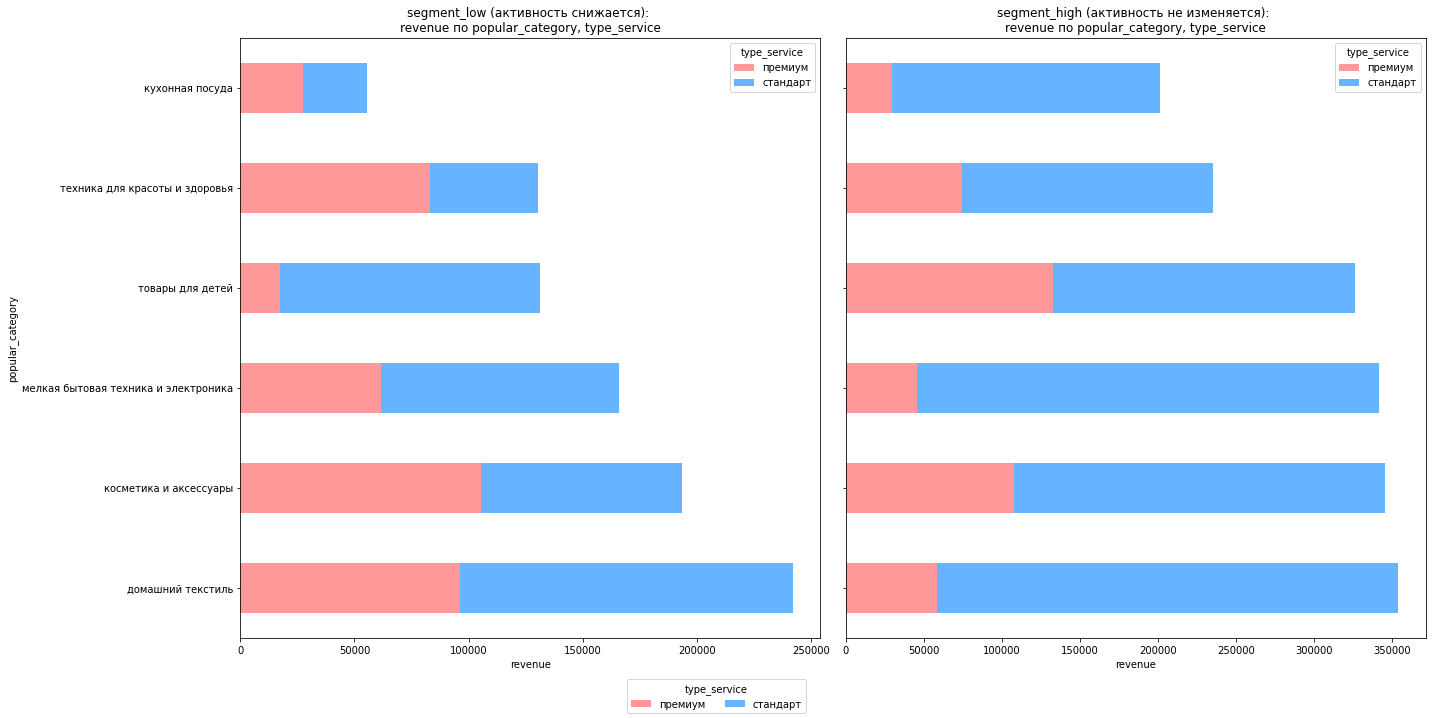

In [110]:
plot_segment_comparison(
    df_1=segment_low,
    df_2=segment_high,
    groupby_cols=['popular_category', 'type_service'],
    value_col='revenue',
    segment_names=('segment_low (активность снижается)', 'segment_high (активность не изменяется)'),
    top_n=None
)

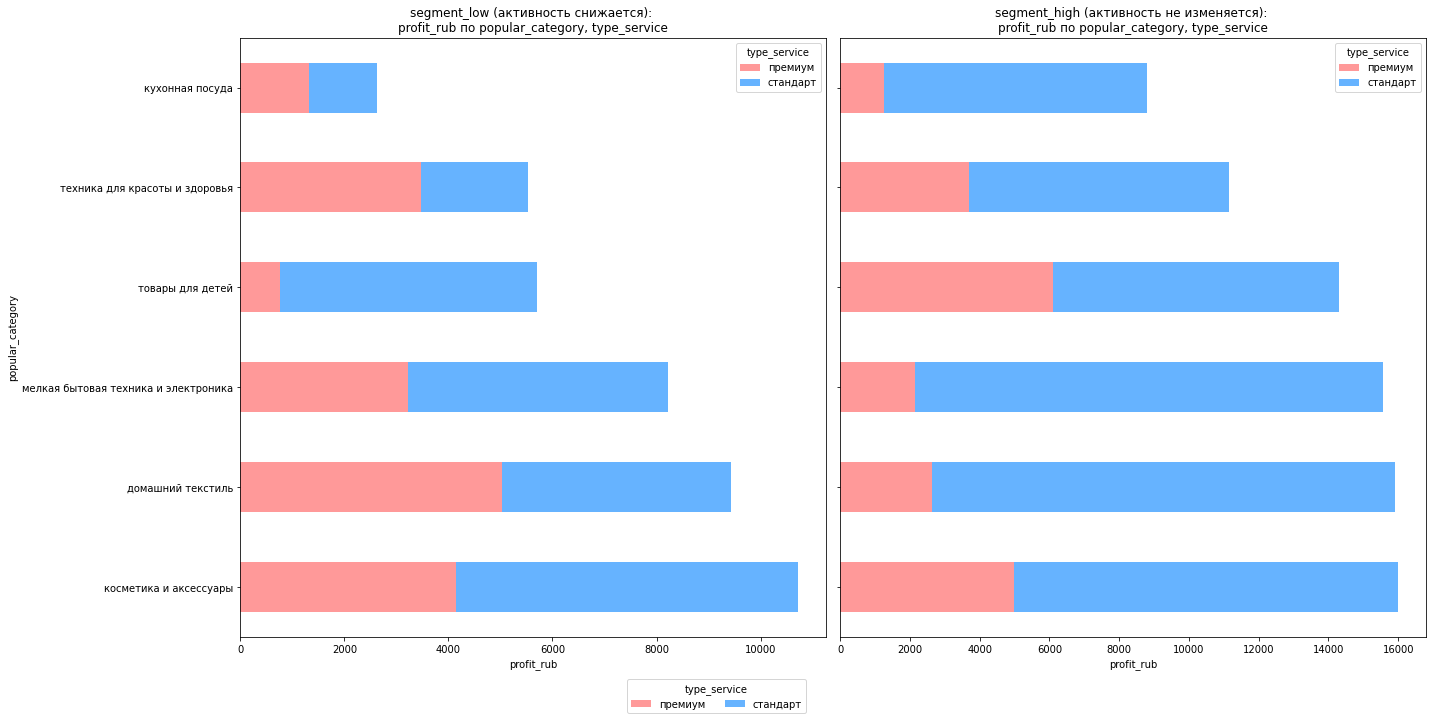

In [111]:
plot_segment_comparison(
    df_1=segment_low,
    df_2=segment_high,
    groupby_cols=['popular_category', 'type_service'],
    value_col='profit_rub',
    segment_names=('segment_low (активность снижается)', 'segment_high (активность не изменяется)'),
    top_n=None
)

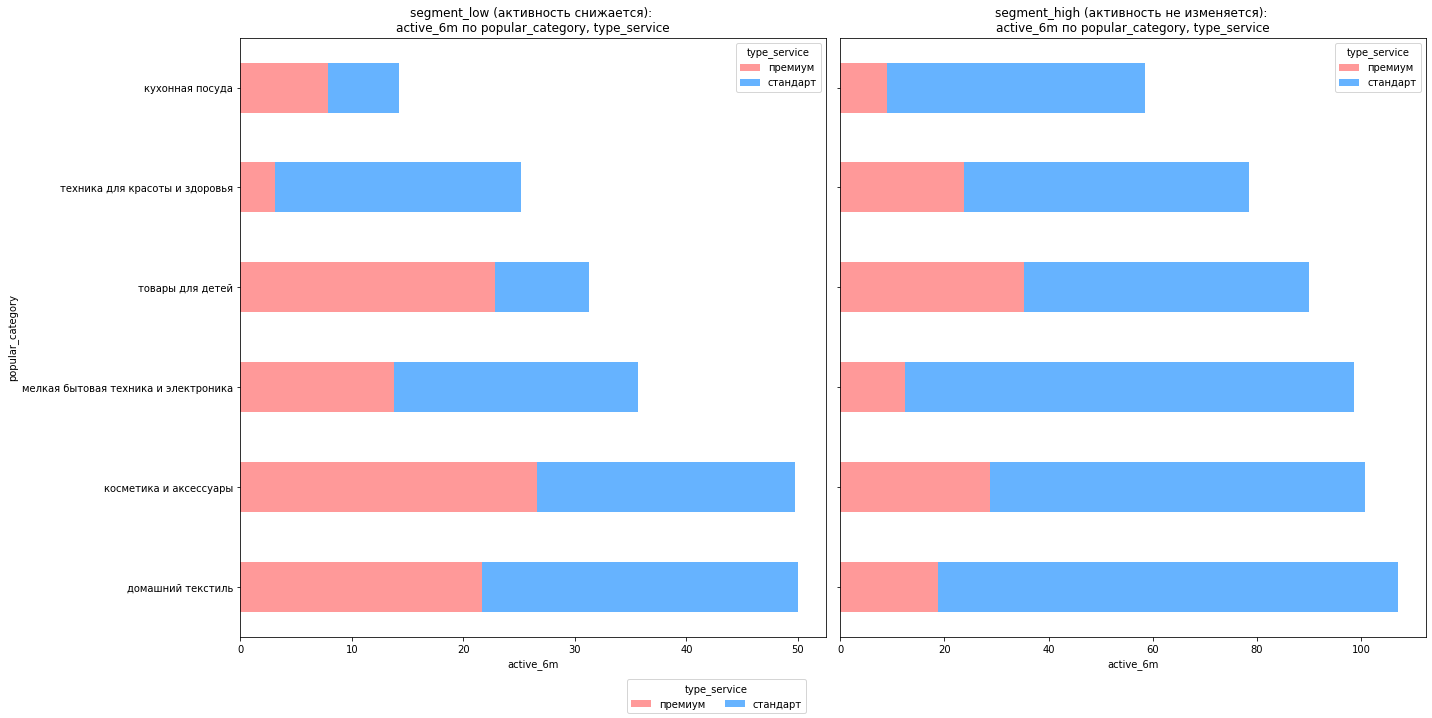

In [112]:
plot_segment_comparison(
    df_1=segment_low,
    df_2=segment_high,
    groupby_cols=['popular_category', 'type_service'],
    value_col='active_6m',
    segment_names=('segment_low (активность снижается)', 'segment_high (активность не изменяется)'),
    top_n=None
)

<div style="background-color:aquamarine; color:#black; text-align:left; padding:2%">
<font size="4", color= "black"><b>Результат:</b> Мы сделали сегментацию покупателей следующим образом:
    
- группа покупателей, вероятность снижения покупательской активности которых более 60% и прибыльность за отчетный период больше средней,
- группа покупателей, вероятность снижения покупательской активности которых менее 60% и прибыльность за отчетный период больше средней
    
Второй сегмент выбран с целью анализа возможных причин, почему активность этих покупателей не снизилась и выработки рекомендаций для работы с первым сегментом.
    
Рекомендации бизнесу:
- лояльные покупатели приносят большую прибыль и выручку, чем те, чья активность снижается
- покупатели, имеющие детей, чаще используют подписку премиум, нужно активизировать рекламу для данного сегмента
- лояльные покупатели реже осуществляют покупки по акциям, но в целом на них приходится больший маркетинговый бюджет,
- основной упор нужно сделать на удержании покупателей и мотивацию их на большее время провождения на сайте</font>


 <div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



Данный раздел студент сам выбирает как проводить,  главное чтобы была логика и рассуждения.  С этим всё в порядке


Отличные графики, по которым легко проводить сравнение 

<div class="alert alert-warning">


Совет 🤔:

 

- Можно посмотреть на динамику выручки по месяцам, в группировке по категориальным признакам (популярная категория Товаров). Отслеживание динамики, как и сравнение, отличный способ найти в данных что то интересное

  

## Общий вывод

<div style="background-color:aquamarine; color:#black; text-align:left; padding:2%">
<font size="4", color= "black">Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.<br>

<b>Основные выводы и обоснования:</b><br>
- Данные оказались почти идеальными: удалено два неявных дубликата и один выброс, пропусков нет. 
- Лучшей моделью оказалась SVC(C=2, probability=True, random_state=42). Значение метрики ROC_AUC на тесте = 0.91.
- Акционные покупки — главный фактор повторных заказов.
- Модель показала, что наличие промо-маркировки и повышает вероятность следующей покупки сильнее любого другого признака. Значит, стоит чаще и точнее таргетировать акции, особенно персональные.
- Тип сервиса («Премиум» vs «Стандарт») тоже влияет на конверсию.
- Среднее число просмотренных категорий за визит — лучший предиктор удержания. Нужно расширять «витрину»: рекомендации, подборки, быстрые фильтры.
- Сегмент «высокая прибыль, высокий риск оттока» почти не реагирует на классические акции, исключение - товарные категории "Косметика и аксессуары" и "Домашний текстиль".
- Максимальная выручка и прибыль у лояльных покупателей по категориям "Товары для детей", "Мелкая бытовая техника и электроника", "Косметика и аксессуары" и "Домашний текстиль".
- Максимальная выручка и прибыль у покупателей со сниженной активностью - по категориям "Косметика и аксессуары" и "Домашний текстиль".
- Покупатели, посещающие мало страниц за визит, имеют одни из самых наибольших вероятностей, на снижение своей активности. Необходимо придумать что-нибудь, для их дальнейшего удержания, например систему рекомендаций товаров на основе их предыдущих предпочтений.
</font>


<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>



Артем, у тебя старательно выполненная работа, все четко, осмысленно.  



Выводы подробные, в конце разделов есть промежуточные выводы. 

Данный проект не только про моделирование, а даже больше про анализ.  Тут конечно надо было проявить логику и показать рассуждение в разделе сегментация, что тебе вполне удалось.

Графики аккуратные, здорово Что используешь seaborn, subplots

    
Я оставил небольшие советы желтым, по желанию можешь воспользоваться, в частности:

 
         
- для market_money, market_time   стоит построить графики с учетом группировки по "период" 
		 
		 
 		
- провести дополнительную проверку с помощью VIF - для разнообразия
		
	
- можно увидеть интересные вещи используя график scatter между выручками и id/таргет и id/акционные продажи	
 

- наверное самый интересный график shap это   .beeswarm, ведь нам интересно оценить не только значимость, но и какая именно связь (прямая или обратная) между признаками и таргетом. Предлагаю построить и его  


- поменять формулировку .best_score_ 

    
    
    
Обязательное к исправлению:


 
	
- для дискретных значений строим countplot 
 

- стоит разобраться что такое мультиколлинеарность (Теоретический аспект)
 
    
    
    
- стоит показать проверку что .predict_proba()[:,1] это вероятность "снизилась" 
 
 
- объясняем почему выбрали ту или иную метрику
  
    
    
- cтоит проанализировать график  beeswarm   
    



Жду исправлений, для принятия проекта. Если какие то вопросы, то сразу спрашивай ) 


<div class="alert alert-info"> <b>Комментарии студентаV1:</b> Марат, спасибо! Очень полезное ревью. Исправил все критические замечания. Прошу проверить работу.</div>


<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Спасибо за работу!    

    
Красное исправлено,   желтые советы использованы, на  вопросы есть ответы  (это все было по желанию), значит стремишься развиваться, а желание и интерес это главное. Надеюсь мои советы и вопросики были полезны и в копилочку знаний упало что то новое, а проект стал лучше, и симпатичней.

 

  
Отличная работа Артём. Желаю успехов в дальнейшей учебе!

 
</div>